In [529]:
# Setup
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from skgstat import Variogram, OrdinaryKriging
# plt.style.use('ggplot')
os.environ['SKG_SUPPRESS'] = "true"

import geopandas
from shapely.geometry import Point

import random

In [530]:
root_dir = os.getcwd()

In [531]:
# import the data
import zipfile
import urllib

EXTRACT_PATH = os.path.join(root_dir, 'data')
PATH = os.path.join("data", "zip")
URL_list = []
for i in range(2014,2020+1):
    URL = "https://danepubliczne.imgw.pl/data/dane_pomiarowo_obserwacyjne/dane_meteorologiczne/miesieczne/klimat/%s/%s_m_k.zip" % (i, i)
    URL_list.append(URL)

def fetch_data(list_url=URL_list, housing_path=PATH, extract_path = EXTRACT_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    for url in list_url:
        tgz_path = os.path.join(housing_path, "m_k.zip")
        urllib.request.urlretrieve(url, tgz_path)
        housing_tgz = zipfile.ZipFile(tgz_path)
        housing_tgz.extractall(path=extract_path)
        housing_tgz.close()

In [532]:
fetch_data()

In [535]:
# get files names
input_path = EXTRACT_PATH
files = [f for f in os.listdir(input_path) if f.endswith('.csv') if '_t' not in f]

In [8]:
# import the data form csv files
data = pd.DataFrame()
col_names = ['kod_stacji', 'nazwa_stacji', 'rok', 'mies', 'abs_temp_maks', 'stat_TMAX', 'sr_temp_maks', 'stat_TMXS', 'abs_temp_min', 'stat_TMIN', 'sr_temp_min', 'stat_TMNS', 'sr_temp_mies', 'stat_STM', 'min_temp_grunt', 'stat_TMNG', 'mies_suma_opad', 'stat_SUMM', 'maks_dobowa_suma_opad', 'stat_OPMX', 'pierwszy_dzien_wyst_opad_maks', 'ost_dzien_wyst_opad_maks', 'maks_wys_pork_sniezn', 'stat_PKSN', 'liczba_dni_z_pokr_sniezna', 'liczba_dni_z_opadem_deszczu', 'liczba_dni_z_opadem_sniegu']
for file in files:
    data = pd.read_csv(os.path.join(input_path, file), encoding = 'latin1', 
                       sep = ',', 
                       names = col_names).append(data)

In [9]:
data

kod_stacji nazwa_stacji   rok  mies  abs_temp_maks  stat_TMAX  \
0      249180010     PSZCZYNA  2020     1           10.6        NaN   
1      249180010     PSZCZYNA  2020     2           14.8        NaN   
2      249180010     PSZCZYNA  2020     3           18.7        NaN   
3      249180010     PSZCZYNA  2020     4           23.0        NaN   
4      249180010     PSZCZYNA  2020     5           25.4        NaN   
...          ...          ...   ...   ...            ...        ...   
1860   254220090       OLECKO  2014     8           34.0        NaN   
1861   254220090       OLECKO  2014     9           25.5        NaN   
1862   254220090       OLECKO  2014    10           21.7        NaN   
1863   254220090       OLECKO  2014    11           15.2        NaN   
1864   254220090       OLECKO  2014    12           10.2        NaN   

      sr_temp_maks  stat_TMXS  abs_temp_min  stat_TMIN  ...  stat_SUMM  \
0              4.1        NaN          -7.2        NaN  ...        NaN   
1              8.3        NaN          -5.2        NaN  ...        NaN   
2             10.5        NaN          -6.7        NaN  ...        NaN   
3             16.9        NaN          -4.6        NaN  ...        NaN   
4             16.7        NaN          -1.5        NaN  ...        NaN   
...            ...        ...           ...        ...  ...        ...   
1860          22.8        NaN           7.0        NaN  ...        NaN   
1861          19.2        NaN           3.0        NaN  ...        NaN   
1862          12.4        NaN          -8.2        NaN  ...        NaN   
1863           4.9        NaN         -13.1        NaN  ...        NaN   
1864           1.1        NaN         -15.7        NaN  ...        NaN   

      maks_dobowa_suma_opad  stat_OPMX  pierwszy_dzien_wyst_opad_maks  \
0                       2.8        NaN                           18.0   
1                      18.5        NaN                            4.0   
2                       9.3        NaN                           20.0   
3                       6.1        NaN                           29.0   
4                      20.6        NaN                           30.0   
...                     ...        ...                            ...   
1860                   16.8        NaN                           24.0   
1861                   15.9        NaN                           21.0   
1862                    8.4        NaN                           14.0   
1863                   12.2        NaN                            7.0   
1864                   10.3        NaN                           22.0   

      ost_dzien_wyst_opad_maks  maks_wys_pork_sniezn  stat_PKSN  \
0                          NaN                     2        NaN   
1                          NaN                     3        NaN   
2                          NaN                     1        NaN   
3                          NaN                     1        NaN   
4                          NaN                     0        NaN   
...                        ...                   ...        ...   
1860                       NaN                     0        NaN   
1861                       NaN                     0        NaN   
1862                       NaN                     0        NaN   
1863                       NaN                     3        NaN   
1864                       NaN                     2        NaN   

      liczba_dni_z_pokr_sniezna  liczba_dni_z_opadem_deszczu  \
0                             4                            9   
1                             1                           16   
2                             1                            8   
3                             1                            4   
4                             0                           17   
...                         ...                          ...   
1860                          0                           23   
1861                          0                            8   
1862  

In [10]:
# import the meteo codes of stations
kod_meteo = pd.read_csv('wykaz_stacji_klimat.csv', 
            encoding = 'latin1', 
            sep = ';', 
            names = ['kod_stacji', 'kod_meteo', 'nazwa_stacji', 'E', 'N'],
                       header = 0)

In [11]:
# merge the data and meteo codes of stations
data_stations = data.merge(kod_meteo, on = 'kod_stacji')

In [12]:
data_stations

kod_stacji nazwa_stacji_x   rok  mies  abs_temp_maks  stat_TMAX  \
0      249180010       PSZCZYNA  2020     1           10.6        NaN   
1      249180010       PSZCZYNA  2020     2           14.8        NaN   
2      249180010       PSZCZYNA  2020     3           18.7        NaN   
3      249180010       PSZCZYNA  2020     4           23.0        NaN   
4      249180010       PSZCZYNA  2020     5           25.4        NaN   
...          ...            ...   ...   ...            ...        ...   
7031   253230160        SUPRAL  2014     8           34.4        NaN   
7032   253230160        SUPRAL  2014     9           26.8        NaN   
7033   253230160        SUPRAL  2014    10           22.8        NaN   
7034   253230160        SUPRAL  2014    11           18.5        NaN   
7035   253230160        SUPRAL  2014    12           10.9        NaN   

      sr_temp_maks  stat_TMXS  abs_temp_min  stat_TMIN  ...  \
0              4.1        NaN          -7.2        NaN  ...   
1              8.3        NaN          -5.2        NaN  ...   
2             10.5        NaN          -6.7        NaN  ...   
3             16.9        NaN          -4.6        NaN  ...   
4             16.7        NaN          -1.5        NaN  ...   
...            ...        ...           ...        ...  ...   
7031          23.8        NaN           3.8        NaN  ...   
7032          19.5        NaN           1.5        NaN  ...   
7033          14.1        NaN          -7.6        NaN  ...   
7034           5.5        NaN         -15.1        NaN  ...   
7035           1.6        NaN         -13.6        NaN  ...   

      ost_dzien_wyst_opad_maks  maks_wys_pork_sniezn  stat_PKSN  \
0                          NaN                     2        NaN   
1                          NaN                     3        NaN   
2                          NaN                     1        NaN   
3                          NaN                     1        NaN   
4                          NaN                     0        NaN   
...                        ...                   ...        ...   
7031                       NaN                     0        NaN   
7032                       NaN                     0        NaN   
7033                       NaN                     0        NaN   
7034                       NaN                    19        NaN   
7035                       NaN                     4        NaN   

      liczba_dni_z_pokr_sniezna  liczba_dni_z_opadem_deszczu  \
0                             4                            9   
1                             1                           16   
2                             1                            8   
3                             1                            4   
4                             0                           17   
...                         ...                          ...   
7031                          0                           18   
7032                          0                           10   
7033                          0                            6   
7034                         11                            2   
7035                         16                            9   

      liczba_dni_z_opadem_sniegu  kod_meteo  nazwa_stacji_y          E  \
0                              4       5409        PSZCZYNA  18.916667   
1                              7       5409        PSZCZYNA  18.916667   
2                              5       5409        PSZCZYNA  18.916667   
3                              1       5409        PSZCZYNA  18.916667   
4                              0       5409        PSZCZYNA  18.916667   
...                          ...        ...             ...        ...   
7031                           0       2950         SUPRAL  23.332222   
7032                           0       2950         SUPRAL  23.332222   
7033                           0       2950         SUPRAL  23.332222   
7034                           6       2950         SUPRA

In [368]:
# add dummy filter variable for variables without native variable
data_stations['stat_liczba'] = 0

In [370]:
# prepare variables and filter variables names
variables = []
filt_variables = []
for i in data_stations.columns:
    if i.startswith('stat'):
        filt_variables.append(i)
        if 'stat_PKSN' in i:
            filt_variables.append(i)
            filt_variables.append(i)
    elif ('temp' in i) | ('_opad' in i) | ('wys_pokr_sniezn' in i):
        variables.append(i)
    if('liczba_dni' in i):
        variables.append(i)
        filt_variables.append('stat_liczba')

In [371]:
# check the variabiles names
for i, j in zip(variables, filt_variables):
    print(i,'---filt by --->', j)

abs_temp_maks ---filt by ---> stat_TMAX
sr_temp_maks ---filt by ---> stat_TMXS
abs_temp_min ---filt by ---> stat_TMIN
sr_temp_min ---filt by ---> stat_TMNS
sr_temp_mies ---filt by ---> stat_STM
min_temp_grunt ---filt by ---> stat_TMNG
mies_suma_opad ---filt by ---> stat_SUMM
maks_dobowa_suma_opad ---filt by ---> stat_OPMX
pierwszy_dzien_wyst_opad_maks ---filt by ---> stat_PKSN
ost_dzien_wyst_opad_maks ---filt by ---> stat_PKSN
liczba_dni_z_pokr_sniezna ---filt by ---> stat_PKSN
liczba_dni_z_opadem_deszczu ---filt by ---> stat_liczba
liczba_dni_z_opadem_deszczu ---filt by ---> stat_liczba
liczba_dni_z_opadem_sniegu ---filt by ---> stat_liczba
liczba_dni_z_opadem_sniegu ---filt by ---> stat_liczba


In [372]:
# import experimental points coordinates for interpolation 
points = pd.read_csv('punkty_2.csv', 
                     sep = ';', 
                     encoding = 'latin1')[['Lokalizacja', 'E', 'N']]

In [414]:
# Function for experimental points interpolation
import datetime
from dateutil.rrule import rrule, MONTHLY
from sklearn.model_selection import train_test_split
from scipy.stats import expon, reciprocal, uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def rotate_coordinates(coordinates):
    '''Input coordinates as Data Frame, shape xx, 2 - columns E, N'''
    x_prim = pd.DataFrame()
    y_prim = pd.DataFrame()
    X_prim = pd.DataFrame()
    for i, angle in enumerate(np.deg2rad(range(0, 360, 2))): 
        x_val, y_val = np.array(coordinates.T)
        c, s = np.cos(angle), np.sin(angle)
        j = np.matrix([[c, s], [-s, c]])
        m = np.dot(j, [x_val, y_val])
        x_prim = pd.concat((x_prim, pd.DataFrame(m[0].T, columns = ['E_' + str(i)])), axis = 1)
        y_prim = pd.concat((y_prim, pd.DataFrame(m[1].T, columns = ['N_' + str(i)])), axis = 1)
        X_prim = pd.concat(
            (X_prim, 
            pd.DataFrame(m[0].T, columns = ['E_' + str(i)]), 
            pd.DataFrame(m[1].T, columns = ['N_' + str(i)])), axis = 1)
    return X_prim

def RMSE_test(model, X, y):
    '''input: model object, X variable, y variable and compute RMSE'''
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return rmse

def interpolate_points(model, points):
    '''input: model, points - coordinates for interpolation, return predicted interpolations'''
    X_points = points[['E', 'N']]
    X_points_prim = rotate_coordinates(X_points)
    
    predicted = model.predict(X_points_prim)
    return predicted
    

def interpolate(data=data_stations, points = points, 
                variables = variables, 
                filt_variables = filt_variables):
    '''Main interpolation function, return interpolated points for all variables'''
    E_l = []
    N_l = []
    year_l = []
    month_l = []
    variable_l = []
    predictions_l = []
    
    strt_dt = datetime.date(2014,1,1)
    end_dt = datetime.date(2020,10,1)
#     end_dt = datetime.date(2015,3,1) # test variable

    for variable, filter_var in zip(variables, filt_variables):
        for single_date in rrule(MONTHLY, dtstart=strt_dt, until=end_dt):
            
            exception = False
            
            month = single_date.month
            year = single_date.year
            
            filt = ((data['mies']== month) & 
            (data['rok'] == year) & 
            (data[filter_var] != 8) & # filter out no measurement status 8 - no measurement
            (data[variable].notnull())) # filter out NaN values
            

            data_filtered = data[filt]

            X = data_filtered[['E', 'N']]
            y = data_filtered[variable]
            
            if y.size <= 10:
                print('empty y var')
            else:
            
                # data augmentation (rotate coordinates)
                X_prim = rotate_coordinates(X)

                # split the data
                try:
                    X_train, X_test, y_train, y_test =  train_test_split(X_prim, y, test_size = 0.2, train_size = 0.8, random_state = 42, shuffle = True)
                except:
                    print('split exception')

                # build and train the model
                param_distribs = {
                        'n_neighbors': randint(1,10),
                    }

                knr = KNeighborsRegressor(n_neighbors=10, 
                                          metric='euclidean', 
                                          weights= 'distance')
                knr_reg = RandomizedSearchCV(knr, param_distributions=param_distribs,
                                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                             n_jobs= -1, random_state = 42)
                try:
                    knr_reg.fit(X_train, y_train)
                except:
                    exception = True

                if exception:
                    print('exception')
                else:
                    train_RMSE = RMSE_test(knr_reg, X_train, y_train)
                    test_RMSE = RMSE_test(knr_reg, X_test, y_test)
                    print(variable, year, month, 'train_RMSE:', train_RMSE, 'test_RMSE: ', test_RMSE)

                    # interpolate data points
                    predicted = interpolate_points(knr_reg, points)

                    predictions_l.extend(list(predicted))
                    E_l.extend(list(points['E']))
                    N_l.extend(list(points['N']))
                    year_l.extend([year for v, i in enumerate(predicted)])
                    month_l.extend([month for v, i in enumerate(predicted)])
                    variable_l.extend([variable for v, i in enumerate(predicted)])
        
        
    points_estimations = pd.DataFrame(columns = ['E', 'N', 'year', 'month', 'variable', 'predictions'])
    points_estimations['E'] =  E_l
    points_estimations['N'] = N_l
    points_estimations['year'] = year_l
    points_estimations['month'] = month_l
    points_estimations['variable'] = variable_l
    points_estimations['predictions'] = predictions_l
    
    return points_estimations


In [375]:
estimations = interpolate()

abs_temp_maks 2014 1 train_RMSE: 0.0 test_RMSE:  1.1223087995380823
abs_temp_maks 2014 2 train_RMSE: 0.0 test_RMSE:  1.1919575445159682
abs_temp_maks 2014 3 train_RMSE: 0.0 test_RMSE:  1.3654394943041404
abs_temp_maks 2014 4 train_RMSE: 0.0 test_RMSE:  1.6657479271082585
abs_temp_maks 2014 5 train_RMSE: 0.0 test_RMSE:  1.2134394041983658
abs_temp_maks 2014 6 train_RMSE: 0.0 test_RMSE:  1.7347102849271427
abs_temp_maks 2014 7 train_RMSE: 0.0 test_RMSE:  1.403757584732808
abs_temp_maks 2014 8 train_RMSE: 0.0 test_RMSE:  1.26554192299716
abs_temp_maks 2014 9 train_RMSE: 0.0 test_RMSE:  1.1830607297304203
abs_temp_maks 2014 10 train_RMSE: 0.0 test_RMSE:  1.2257472935797806
abs_temp_maks 2014 11 train_RMSE: 0.0 test_RMSE:  1.2881900491517428
abs_temp_maks 2014 12 train_RMSE: 0.0 test_RMSE:  0.8439025934752734
abs_temp_maks 2015 1 train_RMSE: 0.0 test_RMSE:  0.9398859010067838
abs_temp_maks 2015 2 train_RMSE: 0.0 test_RMSE:  1.2063168601523755
abs_temp_maks 2015 3 train_RMSE: 0.0 test_RMSE: 

sr_temp_maks 2017 5 train_RMSE: 0.0 test_RMSE:  1.0486927846950986
sr_temp_maks 2017 6 train_RMSE: 0.0 test_RMSE:  1.2811933722828226
sr_temp_maks 2017 7 train_RMSE: 0.0 test_RMSE:  1.1606506976120974
sr_temp_maks 2017 8 train_RMSE: 0.0 test_RMSE:  1.3460793308966323
sr_temp_maks 2017 9 train_RMSE: 0.0 test_RMSE:  1.1363096268402435
sr_temp_maks 2017 10 train_RMSE: 0.0 test_RMSE:  0.9597973740547905
sr_temp_maks 2017 11 train_RMSE: 0.0 test_RMSE:  1.0024094068971838
sr_temp_maks 2017 12 train_RMSE: 0.0 test_RMSE:  0.9497321169701223
sr_temp_maks 2018 1 train_RMSE: 0.0 test_RMSE:  0.7931152513751215
sr_temp_maks 2018 2 train_RMSE: 0.0 test_RMSE:  0.7038598199079921
sr_temp_maks 2018 3 train_RMSE: 0.0 test_RMSE:  0.9877802068121132
sr_temp_maks 2018 4 train_RMSE: 0.0 test_RMSE:  1.0530179356553648
sr_temp_maks 2018 5 train_RMSE: 0.0 test_RMSE:  0.9968350007696315
sr_temp_maks 2018 6 train_RMSE: 0.0 test_RMSE:  0.9911349337209171
sr_temp_maks 2018 7 train_RMSE: 0.0 test_RMSE:  1.102663595

abs_temp_min 2020 10 train_RMSE: 0.0 test_RMSE:  1.3008846102378908
sr_temp_min 2014 1 train_RMSE: 0.0 test_RMSE:  0.8589946088376331
sr_temp_min 2014 2 train_RMSE: 0.0 test_RMSE:  1.1394330520846125
sr_temp_min 2014 3 train_RMSE: 0.0 test_RMSE:  1.0109679660574005
sr_temp_min 2014 4 train_RMSE: 0.0 test_RMSE:  1.100943759226467
sr_temp_min 2014 5 train_RMSE: 0.0 test_RMSE:  0.9272734087001998
sr_temp_min 2014 6 train_RMSE: 0.0 test_RMSE:  1.3598413371546156
sr_temp_min 2014 7 train_RMSE: 0.0 test_RMSE:  1.2047976435729517
sr_temp_min 2014 8 train_RMSE: 0.0 test_RMSE:  1.2912599458936482
sr_temp_min 2014 9 train_RMSE: 0.0 test_RMSE:  1.4817790493695702
sr_temp_min 2014 10 train_RMSE: 0.0 test_RMSE:  1.174484873647265
sr_temp_min 2014 11 train_RMSE: 0.0 test_RMSE:  0.861718697396739
sr_temp_min 2014 12 train_RMSE: 0.0 test_RMSE:  0.8287827857387714
sr_temp_min 2015 1 train_RMSE: 0.0 test_RMSE:  0.8472462646638204
sr_temp_min 2015 2 train_RMSE: 0.0 test_RMSE:  0.9245774385297917
sr_temp_

sr_temp_mies 2017 6 train_RMSE: 0.0 test_RMSE:  0.7334377861616377
sr_temp_mies 2017 7 train_RMSE: 0.0 test_RMSE:  0.7786734902342137
sr_temp_mies 2017 8 train_RMSE: 0.0 test_RMSE:  0.6957045935853682
sr_temp_mies 2017 9 train_RMSE: 0.0 test_RMSE:  0.6500509569845078
sr_temp_mies 2017 10 train_RMSE: 0.0 test_RMSE:  0.6177578224384745
sr_temp_mies 2017 11 train_RMSE: 0.0 test_RMSE:  0.6488258526488085
sr_temp_mies 2017 12 train_RMSE: 0.0 test_RMSE:  0.8022917334570134
sr_temp_mies 2018 1 train_RMSE: 0.0 test_RMSE:  0.6643833898649231
sr_temp_mies 2018 2 train_RMSE: 0.0 test_RMSE:  0.5625632479804992
sr_temp_mies 2018 3 train_RMSE: 0.0 test_RMSE:  0.7019304628105439
sr_temp_mies 2018 4 train_RMSE: 0.0 test_RMSE:  0.7939038215329578
sr_temp_mies 2018 5 train_RMSE: 0.0 test_RMSE:  0.5934934465664086
sr_temp_mies 2018 6 train_RMSE: 0.0 test_RMSE:  0.6376845904871488
sr_temp_mies 2018 7 train_RMSE: 0.0 test_RMSE:  0.6154365441458797
sr_temp_mies 2018 8 train_RMSE: 0.0 test_RMSE:  0.577775371

min_temp_grunt 2020 8 train_RMSE: 0.0 test_RMSE:  2.5071096039650014
min_temp_grunt 2020 9 train_RMSE: 0.0 test_RMSE:  1.0228422063322264
min_temp_grunt 2020 10 train_RMSE: 0.0 test_RMSE:  0.9044418976926362
mies_suma_opad 2014 1 train_RMSE: 0.0 test_RMSE:  14.011163076330915
mies_suma_opad 2014 2 train_RMSE: 0.0 test_RMSE:  6.830209158372424
mies_suma_opad 2014 3 train_RMSE: 0.0 test_RMSE:  15.402870425738042
mies_suma_opad 2014 4 train_RMSE: 0.0 test_RMSE:  22.58041481195004
mies_suma_opad 2014 5 train_RMSE: 0.0 test_RMSE:  60.851327530863166
mies_suma_opad 2014 6 train_RMSE: 0.0 test_RMSE:  20.41610301001667
mies_suma_opad 2014 7 train_RMSE: 0.0 test_RMSE:  46.56826597060468
mies_suma_opad 2014 8 train_RMSE: 0.0 test_RMSE:  32.4645281899644
mies_suma_opad 2014 9 train_RMSE: 0.0 test_RMSE:  27.64842850090962
mies_suma_opad 2014 10 train_RMSE: 0.0 test_RMSE:  13.113956810624453
mies_suma_opad 2014 11 train_RMSE: 0.0 test_RMSE:  8.117882815678975
mies_suma_opad 2014 12 train_RMSE: 0.0 

maks_dobowa_suma_opad 2016 9 train_RMSE: 0.0 test_RMSE:  13.965144798383541
maks_dobowa_suma_opad 2016 10 train_RMSE: 0.0 test_RMSE:  9.891893454228596
maks_dobowa_suma_opad 2016 11 train_RMSE: 0.0 test_RMSE:  4.337110881232903
maks_dobowa_suma_opad 2016 12 train_RMSE: 0.0 test_RMSE:  9.493715763379083
maks_dobowa_suma_opad 2017 1 train_RMSE: 0.0 test_RMSE:  1.4611944357341742
maks_dobowa_suma_opad 2017 2 train_RMSE: 0.0 test_RMSE:  3.492748574536965
maks_dobowa_suma_opad 2017 3 train_RMSE: 0.0 test_RMSE:  4.799557163040244
maks_dobowa_suma_opad 2017 4 train_RMSE: 0.0 test_RMSE:  3.3797600054953123
maks_dobowa_suma_opad 2017 5 train_RMSE: 0.0 test_RMSE:  11.450260293536454
maks_dobowa_suma_opad 2017 6 train_RMSE: 0.0 test_RMSE:  9.957369175655824
maks_dobowa_suma_opad 2017 7 train_RMSE: 0.0 test_RMSE:  11.512583378809436
maks_dobowa_suma_opad 2017 8 train_RMSE: 0.0 test_RMSE:  9.846889703842297
maks_dobowa_suma_opad 2017 9 train_RMSE: 0.0 test_RMSE:  9.677653608022203
maks_dobowa_suma_

pierwszy_dzien_wyst_opad_maks 2018 6 train_RMSE: 0.0 test_RMSE:  10.48240381472911
pierwszy_dzien_wyst_opad_maks 2018 7 train_RMSE: 0.0 test_RMSE:  4.893198919081182
pierwszy_dzien_wyst_opad_maks 2018 8 train_RMSE: 0.0 test_RMSE:  9.001326700117156
pierwszy_dzien_wyst_opad_maks 2018 9 train_RMSE: 0.0 test_RMSE:  7.376952601276379
pierwszy_dzien_wyst_opad_maks 2018 10 train_RMSE: 0.0 test_RMSE:  2.170029769569703
pierwszy_dzien_wyst_opad_maks 2018 11 train_RMSE: 0.0 test_RMSE:  4.5473899591872335
pierwszy_dzien_wyst_opad_maks 2018 12 train_RMSE: 0.0 test_RMSE:  5.1014738436439355
pierwszy_dzien_wyst_opad_maks 2019 1 train_RMSE: 0.0 test_RMSE:  4.565657777050975
pierwszy_dzien_wyst_opad_maks 2019 2 train_RMSE: 0.0 test_RMSE:  6.460027573784936
pierwszy_dzien_wyst_opad_maks 2019 3 train_RMSE: 0.0 test_RMSE:  4.194078403653287
pierwszy_dzien_wyst_opad_maks 2019 4 train_RMSE: 0.0 test_RMSE:  2.746358028105584
pierwszy_dzien_wyst_opad_maks 2019 5 train_RMSE: 0.0 test_RMSE:  2.787615805348458

liczba_dni_z_pokr_sniezna 2019 4 train_RMSE: 0.0 test_RMSE:  0.6178641590164418
liczba_dni_z_pokr_sniezna 2019 5 train_RMSE: 0.0 test_RMSE:  1.0344630234381316
liczba_dni_z_pokr_sniezna 2019 6 train_RMSE: 0.0 test_RMSE:  0.06120337381577505
liczba_dni_z_pokr_sniezna 2019 7 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_pokr_sniezna 2019 8 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_pokr_sniezna 2019 9 train_RMSE: 0.0 test_RMSE:  0.0408022492105167
liczba_dni_z_pokr_sniezna 2019 10 train_RMSE: 0.0 test_RMSE:  0.12917476969936575
liczba_dni_z_pokr_sniezna 2019 11 train_RMSE: 0.0 test_RMSE:  0.18681164144210557
liczba_dni_z_pokr_sniezna 2019 12 train_RMSE: 0.0 test_RMSE:  3.1065126323976444
liczba_dni_z_pokr_sniezna 2020 1 train_RMSE: 0.0 test_RMSE:  6.366365020815106
liczba_dni_z_pokr_sniezna 2020 2 train_RMSE: 0.0 test_RMSE:  6.313449458859071
liczba_dni_z_pokr_sniezna 2020 3 train_RMSE: 0.0 test_RMSE:  6.638868347787312
liczba_dni_z_pokr_sniezna 2020 4 train_RMSE: 0.0 test_RMSE:  1.2569

liczba_dni_z_opadem_deszczu 2014 2 train_RMSE: 0.0 test_RMSE:  2.040069162640296
liczba_dni_z_opadem_deszczu 2014 3 train_RMSE: 0.0 test_RMSE:  1.6154671085768817
liczba_dni_z_opadem_deszczu 2014 4 train_RMSE: 0.0 test_RMSE:  2.2453774259044788
liczba_dni_z_opadem_deszczu 2014 5 train_RMSE: 0.0 test_RMSE:  2.06240113834232
liczba_dni_z_opadem_deszczu 2014 6 train_RMSE: 0.0 test_RMSE:  2.532694692687324
liczba_dni_z_opadem_deszczu 2014 7 train_RMSE: 0.0 test_RMSE:  2.0476680046401716
liczba_dni_z_opadem_deszczu 2014 8 train_RMSE: 0.0 test_RMSE:  2.802628364375254
liczba_dni_z_opadem_deszczu 2014 9 train_RMSE: 0.0 test_RMSE:  1.408126483936188
liczba_dni_z_opadem_deszczu 2014 10 train_RMSE: 0.0 test_RMSE:  3.1413071462577187
liczba_dni_z_opadem_deszczu 2014 11 train_RMSE: 0.0 test_RMSE:  2.8941584137869594
liczba_dni_z_opadem_deszczu 2014 12 train_RMSE: 0.0 test_RMSE:  1.6860412509870124
liczba_dni_z_opadem_deszczu 2015 1 train_RMSE: 0.0 test_RMSE:  4.461266661848855
liczba_dni_z_opadem_

liczba_dni_z_opadem_sniegu 2015 10 train_RMSE: 0.0 test_RMSE:  0.6030371230472241
liczba_dni_z_opadem_sniegu 2015 11 train_RMSE: 0.0 test_RMSE:  1.685199031547884
liczba_dni_z_opadem_sniegu 2015 12 train_RMSE: 0.0 test_RMSE:  1.9499095413494765
liczba_dni_z_opadem_sniegu 2016 1 train_RMSE: 0.0 test_RMSE:  3.9847510038994916
liczba_dni_z_opadem_sniegu 2016 2 train_RMSE: 0.0 test_RMSE:  2.734017026413781
liczba_dni_z_opadem_sniegu 2016 3 train_RMSE: 0.0 test_RMSE:  1.6052906057186747
liczba_dni_z_opadem_sniegu 2016 4 train_RMSE: 0.0 test_RMSE:  1.013913557322976
liczba_dni_z_opadem_sniegu 2016 5 train_RMSE: 0.0 test_RMSE:  0.10007165166284399
liczba_dni_z_opadem_sniegu 2016 6 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2016 7 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2016 8 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2016 9 train_RMSE: 0.0 test_RMSE:  0.3465058088979382
liczba_dni_z_opadem_sniegu 2016 10 train_RMSE: 0.0 test_RMSE:  0.7639554

liczba_dni_z_opadem_sniegu 2017 10 train_RMSE: 0.0 test_RMSE:  0.9980926392434636
liczba_dni_z_opadem_sniegu 2017 11 train_RMSE: 0.0 test_RMSE:  2.422733116382798
liczba_dni_z_opadem_sniegu 2017 12 train_RMSE: 0.0 test_RMSE:  3.640660308492159
liczba_dni_z_opadem_sniegu 2018 1 train_RMSE: 0.0 test_RMSE:  1.6122439129293111
liczba_dni_z_opadem_sniegu 2018 2 train_RMSE: 0.0 test_RMSE:  2.877259136371981
liczba_dni_z_opadem_sniegu 2018 3 train_RMSE: 0.0 test_RMSE:  2.0682643679934736
liczba_dni_z_opadem_sniegu 2018 4 train_RMSE: 0.0 test_RMSE:  0.7540996709497564
liczba_dni_z_opadem_sniegu 2018 5 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2018 6 train_RMSE: 0.0 test_RMSE:  0.41805170665706926
liczba_dni_z_opadem_sniegu 2018 7 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2018 8 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2018 9 train_RMSE: 0.0 test_RMSE:  0.48584011664840937
liczba_dni_z_opadem_sniegu 2018 10 train_RMSE: 0.0 test_RMSE:  0.479931

In [376]:
estimations.to_csv('estimations.csv')

In [446]:
# interpolation on full dataset
import datetime
from dateutil.rrule import rrule, MONTHLY
from sklearn.model_selection import train_test_split
from scipy.stats import expon, reciprocal, uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def rotate_coordinates(coordinates):
    '''Input coordinates as Data Frame, shape xx, 2 - columns E, N'''
    x_prim = pd.DataFrame()
    y_prim = pd.DataFrame()
    X_prim = pd.DataFrame()
    for i, angle in enumerate(np.deg2rad(range(0, 360, 2))): 
        x_val, y_val = np.array(coordinates.T)
        c, s = np.cos(angle), np.sin(angle)
        j = np.matrix([[c, s], [-s, c]])
        m = np.dot(j, [x_val, y_val])
        x_prim = pd.concat((x_prim, pd.DataFrame(m[0].T, columns = ['E_' + str(i)])), axis = 1)
        y_prim = pd.concat((y_prim, pd.DataFrame(m[1].T, columns = ['N_' + str(i)])), axis = 1)
        X_prim = pd.concat(
            (X_prim, 
            pd.DataFrame(m[0].T, columns = ['E_' + str(i)]), 
            pd.DataFrame(m[1].T, columns = ['N_' + str(i)])), axis = 1)
    return X_prim

def RMSE_test(model, X, y):
    '''input: model object, X variable, y variable and compute RMSE'''
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return rmse

def interpolate_points(model, points):
    '''input: model, points - coordinates for interpolation, return predicted interpolations'''
    X_points = points[['E', 'N']]
    X_points_prim = rotate_coordinates(X_points)
    
    predicted = model.predict(X_points_prim)
    return predicted
    

def interpolate(data=data_stations, points = points, 
                variables = variables, 
                filt_variables = filt_variables):
    '''Main interpolation function on full dataset, return interpolated points for all variables'''
    E_l = []
    N_l = []
    year_l = []
    month_l = []
    variable_l = []
    predictions_l = []
    
    strt_dt = datetime.date(2014,1,1)
    end_dt = datetime.date(2020,10,1)
#     end_dt = datetime.date(2015,3,1) # test variable

    for variable, filter_var in zip(variables, filt_variables):
        for single_date in rrule(MONTHLY, dtstart=strt_dt, until=end_dt):
            
            exception = False
            
            month = single_date.month
            year = single_date.year
            
            filt = ((data['mies']== month) & 
            (data['rok'] == year) & 
            (data[filter_var] != 8) & # filter out no measurement status 8 - no measurement
            (data[variable].notnull())) # filter out NaN values
            

            data_filtered = data[filt]

            X = data_filtered[['E', 'N']]
            y = data_filtered[variable]
            
            if y.size <= 10:
                print('empty y var')
            else:
            
                # data augmentation (rotate coordinates)
                X_prim = rotate_coordinates(X)

#                 # split the data
#                 try:
#                     X_train, X_test, y_train, y_test =  train_test_split(X_prim, y, test_size = 0.2, train_size = 0.8, random_state = 42, shuffle = True)
#                 except:
#                     print('split exception')

                # build and train the model
                param_distribs = {
                        'n_neighbors': randint(1,10),
                    }

                knr = KNeighborsRegressor(n_neighbors=10, 
                                          metric='euclidean', 
                                          weights= 'distance')
                knr_reg = RandomizedSearchCV(knr, param_distributions=param_distribs,
                                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                             n_jobs= -1, random_state = 42)
                try:
                    knr_reg.fit(X_prim, y)
                except:
                    exception = True

                if exception:
                    print('exception')
                else:
                    train_RMSE = RMSE_test(knr_reg, X_prim, y)
#                     test_RMSE = RMSE_test(knr_reg, X_test, y_test)
                    print(variable, year, month, 'train_RMSE:', train_RMSE)

                    # interpolate data points
                    predicted = interpolate_points(knr_reg, points)

                    predictions_l.extend(list(predicted))
                    E_l.extend(list(points['E']))
                    N_l.extend(list(points['N']))
                    year_l.extend([year for v, i in enumerate(predicted)])
                    month_l.extend([month for v, i in enumerate(predicted)])
                    variable_l.extend([variable for v, i in enumerate(predicted)])
        
        
    points_estimations = pd.DataFrame(columns = ['E', 'N', 'year', 'month', 'variable', 'predictions'])
    points_estimations['E'] =  E_l
    points_estimations['N'] = N_l
    points_estimations['year'] = year_l
    points_estimations['month'] = month_l
    points_estimations['variable'] = variable_l
    points_estimations['predictions'] = predictions_l
    
    return points_estimations

In [447]:
full_estimations = interpolate()

abs_temp_maks 2014 1 train_RMSE: 0.0
abs_temp_maks 2014 2 train_RMSE: 0.0
abs_temp_maks 2014 3 train_RMSE: 0.0
abs_temp_maks 2014 4 train_RMSE: 0.0
abs_temp_maks 2014 5 train_RMSE: 0.0
abs_temp_maks 2014 6 train_RMSE: 0.0
abs_temp_maks 2014 7 train_RMSE: 0.0
abs_temp_maks 2014 8 train_RMSE: 0.0
abs_temp_maks 2014 9 train_RMSE: 0.0
abs_temp_maks 2014 10 train_RMSE: 0.0
abs_temp_maks 2014 11 train_RMSE: 0.0
abs_temp_maks 2014 12 train_RMSE: 0.0
abs_temp_maks 2015 1 train_RMSE: 0.0
abs_temp_maks 2015 2 train_RMSE: 0.0
abs_temp_maks 2015 3 train_RMSE: 0.0
abs_temp_maks 2015 4 train_RMSE: 0.0
abs_temp_maks 2015 5 train_RMSE: 0.0
abs_temp_maks 2015 6 train_RMSE: 0.0
abs_temp_maks 2015 7 train_RMSE: 0.0
abs_temp_maks 2015 8 train_RMSE: 0.0
abs_temp_maks 2015 9 train_RMSE: 0.0
abs_temp_maks 2015 10 train_RMSE: 0.0
abs_temp_maks 2015 11 train_RMSE: 0.0
abs_temp_maks 2015 12 train_RMSE: 0.0
abs_temp_maks 2016 1 train_RMSE: 0.0
abs_temp_maks 2016 2 train_RMSE: 0.0
abs_temp_maks 2016 3 train_RMSE:

abs_temp_min 2019 1 train_RMSE: 0.0
abs_temp_min 2019 2 train_RMSE: 0.0
abs_temp_min 2019 3 train_RMSE: 0.0
abs_temp_min 2019 4 train_RMSE: 0.0
abs_temp_min 2019 5 train_RMSE: 0.0
abs_temp_min 2019 6 train_RMSE: 0.0
abs_temp_min 2019 7 train_RMSE: 0.0
abs_temp_min 2019 8 train_RMSE: 0.0
abs_temp_min 2019 9 train_RMSE: 0.0
abs_temp_min 2019 10 train_RMSE: 0.0
abs_temp_min 2019 11 train_RMSE: 0.0
abs_temp_min 2019 12 train_RMSE: 0.0
abs_temp_min 2020 1 train_RMSE: 0.0
abs_temp_min 2020 2 train_RMSE: 0.0
abs_temp_min 2020 3 train_RMSE: 0.0
abs_temp_min 2020 4 train_RMSE: 0.0
abs_temp_min 2020 5 train_RMSE: 0.0
abs_temp_min 2020 6 train_RMSE: 0.0
abs_temp_min 2020 7 train_RMSE: 0.0
abs_temp_min 2020 8 train_RMSE: 0.0
abs_temp_min 2020 9 train_RMSE: 0.0
abs_temp_min 2020 10 train_RMSE: 0.0
sr_temp_min 2014 1 train_RMSE: 0.0
sr_temp_min 2014 2 train_RMSE: 0.0
sr_temp_min 2014 3 train_RMSE: 0.0
sr_temp_min 2014 4 train_RMSE: 0.0
sr_temp_min 2014 5 train_RMSE: 0.0
sr_temp_min 2014 6 train_RMSE

min_temp_grunt 2017 6 train_RMSE: 0.0
min_temp_grunt 2017 7 train_RMSE: 0.0
min_temp_grunt 2017 8 train_RMSE: 0.0
min_temp_grunt 2017 9 train_RMSE: 0.0
min_temp_grunt 2017 10 train_RMSE: 0.0
min_temp_grunt 2017 11 train_RMSE: 0.0
min_temp_grunt 2017 12 train_RMSE: 0.0
min_temp_grunt 2018 1 train_RMSE: 0.0
min_temp_grunt 2018 2 train_RMSE: 0.0
min_temp_grunt 2018 3 train_RMSE: 0.0
min_temp_grunt 2018 4 train_RMSE: 0.0
min_temp_grunt 2018 5 train_RMSE: 0.0
min_temp_grunt 2018 6 train_RMSE: 0.0
min_temp_grunt 2018 7 train_RMSE: 0.0
min_temp_grunt 2018 8 train_RMSE: 0.0
min_temp_grunt 2018 9 train_RMSE: 0.0
min_temp_grunt 2018 10 train_RMSE: 0.0
min_temp_grunt 2018 11 train_RMSE: 0.0
min_temp_grunt 2018 12 train_RMSE: 0.0
min_temp_grunt 2019 1 train_RMSE: 0.0
min_temp_grunt 2019 2 train_RMSE: 0.0
min_temp_grunt 2019 3 train_RMSE: 0.0
min_temp_grunt 2019 4 train_RMSE: 0.0
min_temp_grunt 2019 5 train_RMSE: 0.0
min_temp_grunt 2019 6 train_RMSE: 0.0
min_temp_grunt 2019 7 train_RMSE: 0.0
min_te

maks_dobowa_suma_opad 2020 7 train_RMSE: 0.0
maks_dobowa_suma_opad 2020 8 train_RMSE: 0.0
maks_dobowa_suma_opad 2020 9 train_RMSE: 0.0
maks_dobowa_suma_opad 2020 10 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 1 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 2 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 3 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 4 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 5 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 6 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 7 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 8 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 9 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 10 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 11 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 12 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2015 1 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2015 2 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2015 3 train_RMSE: 0.0
pierwszy_dzien_wyst_o

liczba_dni_z_pokr_sniezna 2018 8 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2018 9 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2018 10 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2018 11 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2018 12 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 1 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 2 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 3 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 4 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 5 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 6 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 7 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 8 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 9 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 10 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 11 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 12 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2020 1 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2020 2 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2020 3 train_RMSE: 0.0
liczba_dni_z_p

liczba_dni_z_opadem_deszczu 2018 5 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 6 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 7 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 8 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 9 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 10 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 11 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 12 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 1 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 2 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 3 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 4 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 5 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 6 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 7 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 8 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 9 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 10 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 11 train_RMSE: 0.0
liczba_dni_z_opadem_deszcz

liczba_dni_z_opadem_sniegu 2018 4 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 5 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 6 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 7 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 8 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 9 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 10 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 11 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 12 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 1 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 2 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 3 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 4 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 5 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 6 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 7 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 8 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 9 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 10 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 11 train_RMSE:

In [426]:
full_estimations.to_csv('full_estimations.csv')

In [445]:
# po wczytaniu zmienia nieco współrzędne a później przy mergu nie łączą się tak samo
# naprawione float_precision
estimations = pd.read_csv('estimations.csv', index_col=0, float_precision='round_trip')
estimations.columns

Index(['E', 'N', 'year', 'month', 'variable', 'predictions'], dtype='object')

In [540]:
# main function for model RMSE, r and signifficant factors estimations
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import pearsonr
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from statistics import mean
from sklearn.model_selection import train_test_split

def transform_row_vec(month, year):
    '''transform year variable for correlation'''
    if month >6:
        new_year = year + 1
    else:
        new_year = year
    return new_year


def transform_predict(pathogen = 'summ_S_tritici', data=full_estimations, alpha = 0.05):
    
    # transform the input data
    estimations_transformed = data.copy()
    estimations_transformed['year'] = np.vectorize(transform_row_vec)(estimations_transformed['month'], estimations_transformed['year'])

    estimations_pivoted = pd.pivot_table(estimations_transformed, 
                                     values = ['predictions'], 
                                    columns = ['month', 'variable'],
                                    index = ['E', 'N', 'year'],
                                    aggfunc = np.mean)
#     estimations_pivoted = pd.DataFrame(estimations_pivoted.to_records())
    col_names = ['E', 'N', 'species', 'year', 'location', 'summ_S_nodorum', 'summ_S_avenae', 'summ_S_tritici']
    isolates_data = pd.read_csv('C:\\jupyter_notebook\\mapa_wyst\\opady\\dane_izolaty.csv', 
                            header= 0, 
                            names = col_names, 
                            sep = ';', 
                            encoding = 'latin1')
#     isolates_data = isolates_data[isolates_data['year']!=2015]
    isolates_merged = isolates_data.merge(estimations_pivoted, how = 'left', on = ['E', 'N', 'year'])
    isolates_merged.fillna(0, inplace=True)
    
    ordinal_encoder = OrdinalEncoder()
    species_encoded = ordinal_encoder.fit_transform(isolates_merged[['species']])
    X_isolates = isolates_merged.iloc[:,8:]
    X_isolates['E'] = isolates_merged['E']
    X_isolates['N'] = isolates_merged['N']
    X_isolates['species'] = species_encoded
    y_sn = isolates_merged[pathogen]
#     print(X_isolates.shape)
#     print(y_sn.shape)
    
    # pearson correlation and selection of atributes

    for i in X_isolates.columns:
        pearson_r = pearsonr(X_isolates[i], y_sn)
#         print(pearson_r)
        if ((pearson_r[1] >=alpha) | (pearson_r == (np.nan, np.nan))):
            X_isolates.drop(i, inplace= True, axis =1)
#         if ((pearson_r[1] <= alpha) & (pearson_r != (np.nan, np.nan))):
            
#             if ((i == 'species') | (i == 'E') | (i == 'N')):
#                 print(i, 'R: ', pearson_r[0], 'p_value:', pearson_r[1])
#             else:
#                 print('month: ', i[1], i[2], 'R: ', pearson_r[0], 'p_value:', pearson_r[1])
#     print(X_isolates.shape)
#     print(y_sn.shape)
    
    # max features for the model
    high_max_features = X_isolates.shape[1]
    
    # split the data
    all_train_RMSE = []
    all_test_RMSE = []
    all_train_pearson_r = []
    all_test_pearson_r = []
    
    for rnd in range(100):
        X_train_isol, X_test_isol, y_train_sn, y_test_sn =  train_test_split(X_isolates, y_sn, test_size = 0.2, train_size = 0.80, random_state = rnd, shuffle = True)

        # build and fit the model

        param_distribs = {
                'n_estimators': randint(low=1, high=100), #100 default
                'max_features': randint(low= 5, high=high_max_features+1),
                'max_depth': randint(low=1, high=100),
        #         'min_samples_split': randint(low=1, high=100),
        #         'min_samples_leaf': randint(low=1, high=100),
        #         'min_impurity_decrease': uniform(0.1,1)

            }

        forest_r = RandomForestRegressor(random_state=42)
        forest_reg = RandomizedSearchCV(forest_r, param_distributions=param_distribs,
                                        n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs= -1)
        forest_reg.fit(X_train_isol, y_train_sn)
        
        train_RMSE = RMSE_test(forest_reg, X_train_isol, y_train_sn)
#         print('RMSE train: ', train_RMSE)
        test_RMSE = RMSE_test(forest_reg, X_test_isol, y_test_sn)
#         print('RMSE test: ', test_RMSE)

        predictions = forest_reg.predict(X_train_isol)
        
        train_pearson_r = pearsonr(predictions, y_train_sn)
#         print('Train vs Predicted',"R: ", train_pearson_r[0], 'p_value: ', train_pearson_r[1])
        
        predictions = forest_reg.predict(X_test_isol)
        
        test_pearson_r = pearsonr(predictions, y_test_sn)
#         print('Test vs Predicted', "R: ", test_pearson_r[0], 'p_value: ', test_pearson_r[1])
        
        all_train_RMSE.append(train_RMSE)
        all_test_RMSE.append(test_RMSE)
        all_train_pearson_r.append(train_pearson_r[0])
        all_test_pearson_r.append(test_pearson_r[0])
    print('Mean train RMSE: ', mean(all_train_RMSE), 'alpha', str(alpha))
    print('Mean test RMSE: ', mean(all_test_RMSE), 'alpha', str(alpha))
    print('Mean train pearson R: ', mean(all_train_pearson_r), 'alpha', str(alpha))
    print('Mean test pearson R: ', mean(all_test_pearson_r), 'alpha', str(alpha))
    return forest_reg
    

In [539]:
# for alph in np.arange(0.20, 0.3, 0.01):
transform_predict(pathogen='summ_S_nodorum', alpha = 0.05)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  17.224660035374715 alpha 0.05
Mean test RMSE:  27.61698218786322 alpha 0.05
Mean train pearson R:  0.8738023376756716 alpha 0.05
Mean test pearson R:  0.6225514775621758 alpha 0.05


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4BD672400>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4BD66F1C0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4BD780B20>},
                   random_state=42, scoring='neg_mean_squared_error')

In [541]:
# 20% treningowe
transform_predict(pathogen='summ_S_nodorum', alpha = 0.05)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  16.86366519192438 alpha 0.05
Mean test RMSE:  30.426288854124277 alpha 0.05
Mean train pearson R:  0.8782894966004261 alpha 0.05
Mean test pearson R:  0.5777328013363037 alpha 0.05


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4C4EEDA60>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4F31C5040>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4C580D3A0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [526]:
# 10% test jak odpalisz drugi raz to policzy inaczej bo parametr jest w funkcji
for alph in np.arange(0.01, 0.3, 0.01):
    transform_predict(pathogen='summ_S_avenae', alpha = alph)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  3.025713227352456 alpha 0.01
Mean test RMSE:  6.9045365820549085 alpha 0.01
Mean train pearson R:  0.9411051103340987 alpha 0.01
Mean test pearson R:  0.5002949050329774 alpha 0.01


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.9046109352598015 alpha 0.02
Mean test RMSE:  7.0387666127964374 alpha 0.02
Mean train pearson R:  0.9463904032878789 alpha 0.02
Mean test pearson R:  0.512481113059623 alpha 0.02


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.9467829296880113 alpha 0.03
Mean test RMSE:  7.038427736072834 alpha 0.03
Mean train pearson R:  0.941272686878656 alpha 0.03
Mean test pearson R:  0.5065548109876011 alpha 0.03


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.897205914682768 alpha 0.04
Mean test RMSE:  7.049245426256967 alpha 0.04
Mean train pearson R:  0.946785229129389 alpha 0.04
Mean test pearson R:  0.49243419417844075 alpha 0.04


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8211423215960654 alpha 0.05
Mean test RMSE:  6.862522795300905 alpha 0.05
Mean train pearson R:  0.9516962143950364 alpha 0.05
Mean test pearson R:  0.5245790728243054 alpha 0.05


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.878891069954741 alpha 0.060000000000000005
Mean test RMSE:  6.969745460222065 alpha 0.060000000000000005
Mean train pearson R:  0.9492528169749704 alpha 0.060000000000000005
Mean test pearson R:  0.5034528987759499 alpha 0.060000000000000005


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.892627068749218 alpha 0.06999999999999999
Mean test RMSE:  6.911289675645789 alpha 0.06999999999999999
Mean train pearson R:  0.9473733498058418 alpha 0.06999999999999999
Mean test pearson R:  0.5044063101465739 alpha 0.06999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8751832627981933 alpha 0.08
Mean test RMSE:  7.010259008935108 alpha 0.08
Mean train pearson R:  0.9498577307376436 alpha 0.08
Mean test pearson R:  0.4786460756266345 alpha 0.08


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.86654835200164 alpha 0.09
Mean test RMSE:  7.019748567848045 alpha 0.09
Mean train pearson R:  0.9499316197797877 alpha 0.09
Mean test pearson R:  0.47979228327524404 alpha 0.09


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8872997701490317 alpha 0.09999999999999999
Mean test RMSE:  6.935796291713773 alpha 0.09999999999999999
Mean train pearson R:  0.9484617166228068 alpha 0.09999999999999999
Mean test pearson R:  0.48786262102406225 alpha 0.09999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.902533690914139 alpha 0.11
Mean test RMSE:  6.962567787805525 alpha 0.11
Mean train pearson R:  0.9484550158646418 alpha 0.11
Mean test pearson R:  0.49454386149695934 alpha 0.11


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.846300210248324 alpha 0.12
Mean test RMSE:  6.980820097528534 alpha 0.12
Mean train pearson R:  0.9525865523238825 alpha 0.12
Mean test pearson R:  0.4920698335086431 alpha 0.12


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.856088380537367 alpha 0.13
Mean test RMSE:  6.924335443916915 alpha 0.13
Mean train pearson R:  0.9506676119029822 alpha 0.13
Mean test pearson R:  0.49872802355805457 alpha 0.13


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.9158128795627554 alpha 0.14
Mean test RMSE:  6.948847372949424 alpha 0.14
Mean train pearson R:  0.9482713377578522 alpha 0.14
Mean test pearson R:  0.4835215557912924 alpha 0.14


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8990777917160244 alpha 0.15000000000000002
Mean test RMSE:  7.034054276041237 alpha 0.15000000000000002
Mean train pearson R:  0.9481312729623173 alpha 0.15000000000000002
Mean test pearson R:  0.47137838705304813 alpha 0.15000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8990777917160244 alpha 0.16
Mean test RMSE:  7.034054276041237 alpha 0.16
Mean train pearson R:  0.9481312729623173 alpha 0.16
Mean test pearson R:  0.47137838705304813 alpha 0.16


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8807050716976064 alpha 0.17
Mean test RMSE:  6.9829398312766715 alpha 0.17
Mean train pearson R:  0.9494904396971101 alpha 0.17
Mean test pearson R:  0.48328720151077953 alpha 0.17


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.829535481172901 alpha 0.18000000000000002
Mean test RMSE:  6.990158764515687 alpha 0.18000000000000002
Mean train pearson R:  0.9520351378347074 alpha 0.18000000000000002
Mean test pearson R:  0.4807989258079186 alpha 0.18000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8803551258944577 alpha 0.19
Mean test RMSE:  7.0159950373812565 alpha 0.19
Mean train pearson R:  0.9502954420195975 alpha 0.19
Mean test pearson R:  0.47365587225768574 alpha 0.19


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8455928385409606 alpha 0.2
Mean test RMSE:  6.959654416246251 alpha 0.2
Mean train pearson R:  0.9537158344992486 alpha 0.2
Mean test pearson R:  0.4909945592689209 alpha 0.2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8455928385409606 alpha 0.21000000000000002
Mean test RMSE:  6.959654416246251 alpha 0.21000000000000002
Mean train pearson R:  0.9537158344992486 alpha 0.21000000000000002
Mean test pearson R:  0.4909945592689209 alpha 0.21000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8455928385409606 alpha 0.22
Mean test RMSE:  6.959654416246251 alpha 0.22
Mean train pearson R:  0.9537158344992486 alpha 0.22
Mean test pearson R:  0.4909945592689209 alpha 0.22


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8591564401071277 alpha 0.23
Mean test RMSE:  6.98045402819139 alpha 0.23
Mean train pearson R:  0.9502192922751668 alpha 0.23
Mean test pearson R:  0.4712134964288542 alpha 0.23


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.841423084609915 alpha 0.24000000000000002
Mean test RMSE:  6.898848036584682 alpha 0.24000000000000002
Mean train pearson R:  0.9525751933383719 alpha 0.24000000000000002
Mean test pearson R:  0.4969588320713039 alpha 0.24000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.841423084609915 alpha 0.25
Mean test RMSE:  6.898848036584682 alpha 0.25
Mean train pearson R:  0.9525751933383719 alpha 0.25
Mean test pearson R:  0.4969588320713039 alpha 0.25


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.8115918169621525 alpha 0.26
Mean test RMSE:  7.032954831198659 alpha 0.26
Mean train pearson R:  0.9535432055113655 alpha 0.26
Mean test pearson R:  0.49103998273247057 alpha 0.26


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.9060603868810615 alpha 0.27
Mean test RMSE:  7.032255122283157 alpha 0.27
Mean train pearson R:  0.9473654301618755 alpha 0.27
Mean test pearson R:  0.48023485993514214 alpha 0.27


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.9609883163000474 alpha 0.28
Mean test RMSE:  7.1396485148655255 alpha 0.28
Mean train pearson R:  0.9427120076585687 alpha 0.28
Mean test pearson R:  0.4603643094714181 alpha 0.28


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.927331916428094 alpha 0.29000000000000004
Mean test RMSE:  7.0133102886467 alpha 0.29000000000000004
Mean train pearson R:  0.9459475346423585 alpha 0.29000000000000004
Mean test pearson R:  0.4668583353791323 alpha 0.29000000000000004


In [542]:
# 20% treningowe full
transform_predict(pathogen='summ_S_avenae', alpha = 0.05)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  2.938283640364055 alpha 0.05
Mean test RMSE:  7.197074130651007 alpha 0.05
Mean train pearson R:  0.9451862071295949 alpha 0.05
Mean test pearson R:  0.49956611934348816 alpha 0.05


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4C5391670>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4BD6836A0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C48C8107C0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [528]:
# 10% test jak odpalisz drugi raz to policzy inaczej bo parametr jest w funkcji
for alph in np.arange(0.05, 0.3, 0.01):
    transform_predict(pathogen='summ_S_tritici', alpha = alph)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  47.713540952018676 alpha 0.05
Mean test RMSE:  53.79662844362963 alpha 0.05
Mean train pearson R:  0.8943266890459909 alpha 0.05
Mean test pearson R:  0.8779101676288577 alpha 0.05


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  47.713540952018676 alpha 0.060000000000000005
Mean test RMSE:  53.79662844362963 alpha 0.060000000000000005
Mean train pearson R:  0.8943266890459909 alpha 0.060000000000000005
Mean test pearson R:  0.8779101676288577 alpha 0.060000000000000005


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  44.84750263634628 alpha 0.07
Mean test RMSE:  58.32165199566076 alpha 0.07
Mean train pearson R:  0.9111662025051176 alpha 0.07
Mean test pearson R:  0.8642952945993567 alpha 0.07


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  33.11975654016588 alpha 0.08000000000000002
Mean test RMSE:  59.90917122892402 alpha 0.08000000000000002
Mean train pearson R:  0.9511901228613197 alpha 0.08000000000000002
Mean test pearson R:  0.862364567178295 alpha 0.08000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  26.724689920143057 alpha 0.09000000000000001
Mean test RMSE:  60.4999590703995 alpha 0.09000000000000001
Mean train pearson R:  0.970478701946022 alpha 0.09000000000000001
Mean test pearson R:  0.851994550054581 alpha 0.09000000000000001


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  35.54408462558014 alpha 0.1
Mean test RMSE:  60.461480757027495 alpha 0.1
Mean train pearson R:  0.9410082096491141 alpha 0.1
Mean test pearson R:  0.8544065370753979 alpha 0.1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  39.01899023125721 alpha 0.11000000000000001
Mean test RMSE:  57.061386690810124 alpha 0.11000000000000001
Mean train pearson R:  0.930489578285209 alpha 0.11000000000000001
Mean test pearson R:  0.8697074985298302 alpha 0.11000000000000001


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  39.01899023125721 alpha 0.12000000000000001
Mean test RMSE:  57.061386690810124 alpha 0.12000000000000001
Mean train pearson R:  0.930489578285209 alpha 0.12000000000000001
Mean test pearson R:  0.8697074985298302 alpha 0.12000000000000001


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  44.580200248414606 alpha 0.13
Mean test RMSE:  54.02155888414319 alpha 0.13
Mean train pearson R:  0.9065121537371084 alpha 0.13
Mean test pearson R:  0.8826412273929192 alpha 0.13


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  42.555853373576255 alpha 0.14
Mean test RMSE:  55.43280875261209 alpha 0.14
Mean train pearson R:  0.9155269953459374 alpha 0.14
Mean test pearson R:  0.8733692728366036 alpha 0.14


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  42.555853373576255 alpha 0.15000000000000002
Mean test RMSE:  55.43280875261209 alpha 0.15000000000000002
Mean train pearson R:  0.9155269953459374 alpha 0.15000000000000002
Mean test pearson R:  0.8733692728366036 alpha 0.15000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  41.5741878964666 alpha 0.16000000000000003
Mean test RMSE:  55.97707128136234 alpha 0.16000000000000003
Mean train pearson R:  0.9195683332926141 alpha 0.16000000000000003
Mean test pearson R:  0.8696815471460163 alpha 0.16000000000000003


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  41.5741878964666 alpha 0.17000000000000004
Mean test RMSE:  55.97707128136234 alpha 0.17000000000000004
Mean train pearson R:  0.9195683332926141 alpha 0.17000000000000004
Mean test pearson R:  0.8696815471460163 alpha 0.17000000000000004


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  40.10865952529497 alpha 0.18000000000000005
Mean test RMSE:  58.477420778488316 alpha 0.18000000000000005
Mean train pearson R:  0.9250750149239447 alpha 0.18000000000000005
Mean test pearson R:  0.8611191654842952 alpha 0.18000000000000005


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  24.533485343818416 alpha 0.19
Mean test RMSE:  60.81836494239343 alpha 0.19
Mean train pearson R:  0.9767196508028292 alpha 0.19
Mean test pearson R:  0.8444890390791239 alpha 0.19


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  24.83369848116236 alpha 0.2
Mean test RMSE:  60.422774707688426 alpha 0.2
Mean train pearson R:  0.97636720050705 alpha 0.2
Mean test pearson R:  0.8483793338022908 alpha 0.2


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  36.2995516432329 alpha 0.21000000000000002
Mean test RMSE:  58.97585134166047 alpha 0.21000000000000002
Mean train pearson R:  0.9385117216215301 alpha 0.21000000000000002
Mean test pearson R:  0.8618340273086832 alpha 0.21000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  28.798801824710512 alpha 0.22000000000000003
Mean test RMSE:  60.46433596246403 alpha 0.22000000000000003
Mean train pearson R:  0.96511448118837 alpha 0.22000000000000003
Mean test pearson R:  0.8515015709047217 alpha 0.22000000000000003


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  28.798801824710512 alpha 0.23000000000000004
Mean test RMSE:  60.46433596246403 alpha 0.23000000000000004
Mean train pearson R:  0.96511448118837 alpha 0.23000000000000004
Mean test pearson R:  0.8515015709047217 alpha 0.23000000000000004


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  31.5751141983294 alpha 0.24000000000000005
Mean test RMSE:  59.598603729591886 alpha 0.24000000000000005
Mean train pearson R:  0.9574063935173133 alpha 0.24000000000000005
Mean test pearson R:  0.857534269507847 alpha 0.24000000000000005


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  25.824879469470137 alpha 0.25000000000000006
Mean test RMSE:  60.00002473014707 alpha 0.25000000000000006
Mean train pearson R:  0.9737878661848779 alpha 0.25000000000000006
Mean test pearson R:  0.8552065157139394 alpha 0.25000000000000006


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  27.559904993366263 alpha 0.26000000000000006
Mean test RMSE:  59.70036961487829 alpha 0.26000000000000006
Mean train pearson R:  0.9695997451085661 alpha 0.26000000000000006
Mean test pearson R:  0.853578964722727 alpha 0.26000000000000006


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  27.559904993366263 alpha 0.27
Mean test RMSE:  59.70036961487829 alpha 0.27
Mean train pearson R:  0.9695997451085661 alpha 0.27
Mean test pearson R:  0.853578964722727 alpha 0.27


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  29.755996374942153 alpha 0.28
Mean test RMSE:  60.50186559931027 alpha 0.28
Mean train pearson R:  0.9643619925992589 alpha 0.28
Mean test pearson R:  0.8568477899646145 alpha 0.28


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  26.17920800492048 alpha 0.29000000000000004
Mean test RMSE:  61.423629878774015 alpha 0.29000000000000004
Mean train pearson R:  0.9747331387203089 alpha 0.29000000000000004
Mean test pearson R:  0.8418047833786453 alpha 0.29000000000000004


In [543]:
# 20% treningowe full
transform_predict(pathogen='summ_S_tritici', alpha = 0.05)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,3 on the right)
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Mean train RMSE:  44.10699692125914 alpha 0.05
Mean test RMSE:  60.1894560770842 alpha 0.05
Mean train pearson R:  0.9080075797590768 alpha 0.05
Mean test pearson R:  0.8388691448865434 alpha 0.05


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4E7A52610>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C48FD660D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002C4C539B340>},
                   random_state=42, scoring='neg_mean_squared_error')

In [429]:
# create grid for spatial analysis and interpolation to create map of pathogens 
# occurence
xx, yy = np.meshgrid(np.linspace(14.122980, 24.145850, 100, axis = 0), 
                     np.linspace( 49.002024, 54.833333, 100, axis = 0))

grid = pd.DataFrame()
grid['E'] = xx.flatten()
grid['N'] = yy.flatten()

In [381]:
# interepolate metheorogical variables for grid and estimate test and train RMSE
import datetime
from dateutil.rrule import rrule, MONTHLY
from sklearn.model_selection import train_test_split
from scipy.stats import expon, reciprocal, uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def rotate_coordinates(coordinates):
    '''Input coordinates as Data Frame, shape xx, 2 - columns E, N'''
    x_prim = pd.DataFrame()
    y_prim = pd.DataFrame()
    X_prim = pd.DataFrame()
    for i, angle in enumerate(np.deg2rad(range(0, 360, 2))): 
        x_val, y_val = np.array(coordinates.T)
        c, s = np.cos(angle), np.sin(angle)
        j = np.matrix([[c, s], [-s, c]])
        m = np.dot(j, [x_val, y_val])
        x_prim = pd.concat((x_prim, pd.DataFrame(m[0].T, columns = ['E_' + str(i)])), axis = 1)
        y_prim = pd.concat((y_prim, pd.DataFrame(m[1].T, columns = ['N_' + str(i)])), axis = 1)
        X_prim = pd.concat(
            (X_prim, 
            pd.DataFrame(m[0].T, columns = ['E_' + str(i)]), 
            pd.DataFrame(m[1].T, columns = ['N_' + str(i)])), axis = 1)
    return X_prim

def RMSE_test(model, X, y):
    '''input: model object, X variable, y variable and compute RMSE'''
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return rmse

def interpolate_points(model, points):
    '''input: model, points - coordinates for interpolation, return predicted interpolations'''
    X_points = points[['E', 'N']]
    X_points_prim = rotate_coordinates(X_points)
    
    predicted = model.predict(X_points_prim)
    return predicted
    

def grid_interpolate(data=data_stations, points = grid, 
                variables = variables, 
                filt_variables = filt_variables):
    '''Main interpolation function on train, test dataset, return interpolated points for all variables'''
    E_l = []
    N_l = []
    year_l = []
    month_l = []
    variable_l = []
    predictions_l = []
    
    strt_dt = datetime.date(2014,1,1)
    end_dt = datetime.date(2020,10,1)
#     end_dt = datetime.date(2015,3,1) # test variable

    for variable, filter_var in zip(variables, filt_variables):
        for single_date in rrule(MONTHLY, dtstart=strt_dt, until=end_dt):
            
            exception = False
            
            month = single_date.month
            year = single_date.year
            
            filt = ((data['mies']== month) & 
            (data['rok'] == year) & 
            (data[filter_var] != 8) & # filter out no measurement status 8 - no measurement
            (data[variable].notnull())) # filter out NaN values
            

            data_filtered = data[filt]

            X = data_filtered[['E', 'N']]
            y = data_filtered[variable]
            
            if y.size <= 10:
                print('empty y var')
            else:
            
                # data augmentation (rotate coordinates)
                X_prim = rotate_coordinates(X)

                # split the data
                try:
                    X_train, X_test, y_train, y_test =  train_test_split(X_prim, y, test_size = 0.2, train_size = 0.8, random_state = 42, shuffle = True)
                except:
                    print('split exception')

                # build and train the model
                param_distribs = {
                        'n_neighbors': randint(1,10),
                    }

                knr = KNeighborsRegressor(n_neighbors=10, 
                                          metric='euclidean', 
                                          weights= 'distance')
                knr_reg = RandomizedSearchCV(knr, param_distributions=param_distribs,
                                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                             n_jobs= -1, random_state = 42)
                try:
                    knr_reg.fit(X_train, y_train)
                except:
                    exception = True

                if exception:
                    print('exception')
                else:
                    train_RMSE = RMSE_test(knr_reg, X_train, y_train)
                    test_RMSE = RMSE_test(knr_reg, X_test, y_test)
                    print(variable, year, month, 'train_RMSE:', train_RMSE, 'test_RMSE: ', test_RMSE)

                    # interpolate data points
                    predicted = interpolate_points(knr_reg, points)

                    predictions_l.extend(list(predicted))
                    E_l.extend(list(points['E']))
                    N_l.extend(list(points['N']))
                    year_l.extend([year for v, i in enumerate(predicted)])
                    month_l.extend([month for v, i in enumerate(predicted)])
                    variable_l.extend([variable for v, i in enumerate(predicted)])
        
        
    points_estimations = pd.DataFrame(columns = ['E', 'N', 'year', 'month', 'variable', 'predictions'])
    points_estimations['E'] =  E_l
    points_estimations['N'] = N_l
    points_estimations['year'] = year_l
    points_estimations['month'] = month_l
    points_estimations['variable'] = variable_l
    points_estimations['predictions'] = predictions_l
    
    return points_estimations

In [383]:
grid_estimations = grid_interpolate()

abs_temp_maks 2014 1 train_RMSE: 0.0 test_RMSE:  1.1223087995380823
abs_temp_maks 2014 2 train_RMSE: 0.0 test_RMSE:  1.1919575445159682
abs_temp_maks 2014 3 train_RMSE: 0.0 test_RMSE:  1.3654394943041404
abs_temp_maks 2014 4 train_RMSE: 0.0 test_RMSE:  1.6657479271082585
abs_temp_maks 2014 5 train_RMSE: 0.0 test_RMSE:  1.2134394041983658
abs_temp_maks 2014 6 train_RMSE: 0.0 test_RMSE:  1.7347102849271427
abs_temp_maks 2014 7 train_RMSE: 0.0 test_RMSE:  1.403757584732808
abs_temp_maks 2014 8 train_RMSE: 0.0 test_RMSE:  1.26554192299716
abs_temp_maks 2014 9 train_RMSE: 0.0 test_RMSE:  1.1830607297304203
abs_temp_maks 2014 10 train_RMSE: 0.0 test_RMSE:  1.2257472935797806
abs_temp_maks 2014 11 train_RMSE: 0.0 test_RMSE:  1.2881900491517428
abs_temp_maks 2014 12 train_RMSE: 0.0 test_RMSE:  0.8439025934752734
abs_temp_maks 2015 1 train_RMSE: 0.0 test_RMSE:  0.9398859010067838
abs_temp_maks 2015 2 train_RMSE: 0.0 test_RMSE:  1.2063168601523755
abs_temp_maks 2015 3 train_RMSE: 0.0 test_RMSE: 

sr_temp_maks 2017 5 train_RMSE: 0.0 test_RMSE:  1.0486927846950986
sr_temp_maks 2017 6 train_RMSE: 0.0 test_RMSE:  1.2811933722828226
sr_temp_maks 2017 7 train_RMSE: 0.0 test_RMSE:  1.1606506976120974
sr_temp_maks 2017 8 train_RMSE: 0.0 test_RMSE:  1.3460793308966323
sr_temp_maks 2017 9 train_RMSE: 0.0 test_RMSE:  1.1363096268402435
sr_temp_maks 2017 10 train_RMSE: 0.0 test_RMSE:  0.9597973740547905
sr_temp_maks 2017 11 train_RMSE: 0.0 test_RMSE:  1.0024094068971838
sr_temp_maks 2017 12 train_RMSE: 0.0 test_RMSE:  0.9497321169701223
sr_temp_maks 2018 1 train_RMSE: 0.0 test_RMSE:  0.7931152513751215
sr_temp_maks 2018 2 train_RMSE: 0.0 test_RMSE:  0.7038598199079921
sr_temp_maks 2018 3 train_RMSE: 0.0 test_RMSE:  0.9877802068121132
sr_temp_maks 2018 4 train_RMSE: 0.0 test_RMSE:  1.0530179356553648
sr_temp_maks 2018 5 train_RMSE: 0.0 test_RMSE:  0.9968350007696315
sr_temp_maks 2018 6 train_RMSE: 0.0 test_RMSE:  0.9911349337209171
sr_temp_maks 2018 7 train_RMSE: 0.0 test_RMSE:  1.102663595

abs_temp_min 2020 10 train_RMSE: 0.0 test_RMSE:  1.3008846102378908
sr_temp_min 2014 1 train_RMSE: 0.0 test_RMSE:  0.8589946088376331
sr_temp_min 2014 2 train_RMSE: 0.0 test_RMSE:  1.1394330520846125
sr_temp_min 2014 3 train_RMSE: 0.0 test_RMSE:  1.0109679660574005
sr_temp_min 2014 4 train_RMSE: 0.0 test_RMSE:  1.100943759226467
sr_temp_min 2014 5 train_RMSE: 0.0 test_RMSE:  0.9272734087001998
sr_temp_min 2014 6 train_RMSE: 0.0 test_RMSE:  1.3598413371546156
sr_temp_min 2014 7 train_RMSE: 0.0 test_RMSE:  1.2047976435729517
sr_temp_min 2014 8 train_RMSE: 0.0 test_RMSE:  1.2912599458936482
sr_temp_min 2014 9 train_RMSE: 0.0 test_RMSE:  1.4817790493695702
sr_temp_min 2014 10 train_RMSE: 0.0 test_RMSE:  1.174484873647265
sr_temp_min 2014 11 train_RMSE: 0.0 test_RMSE:  0.861718697396739
sr_temp_min 2014 12 train_RMSE: 0.0 test_RMSE:  0.8287827857387714
sr_temp_min 2015 1 train_RMSE: 0.0 test_RMSE:  0.8472462646638204
sr_temp_min 2015 2 train_RMSE: 0.0 test_RMSE:  0.9245774385297917
sr_temp_

sr_temp_mies 2017 6 train_RMSE: 0.0 test_RMSE:  0.7334377861616377
sr_temp_mies 2017 7 train_RMSE: 0.0 test_RMSE:  0.7786734902342137
sr_temp_mies 2017 8 train_RMSE: 0.0 test_RMSE:  0.6957045935853682
sr_temp_mies 2017 9 train_RMSE: 0.0 test_RMSE:  0.6500509569845078
sr_temp_mies 2017 10 train_RMSE: 0.0 test_RMSE:  0.6177578224384745
sr_temp_mies 2017 11 train_RMSE: 0.0 test_RMSE:  0.6488258526488085
sr_temp_mies 2017 12 train_RMSE: 0.0 test_RMSE:  0.8022917334570134
sr_temp_mies 2018 1 train_RMSE: 0.0 test_RMSE:  0.6643833898649231
sr_temp_mies 2018 2 train_RMSE: 0.0 test_RMSE:  0.5625632479804992
sr_temp_mies 2018 3 train_RMSE: 0.0 test_RMSE:  0.7019304628105439
sr_temp_mies 2018 4 train_RMSE: 0.0 test_RMSE:  0.7939038215329578
sr_temp_mies 2018 5 train_RMSE: 0.0 test_RMSE:  0.5934934465664086
sr_temp_mies 2018 6 train_RMSE: 0.0 test_RMSE:  0.6376845904871488
sr_temp_mies 2018 7 train_RMSE: 0.0 test_RMSE:  0.6154365441458797
sr_temp_mies 2018 8 train_RMSE: 0.0 test_RMSE:  0.577775371

min_temp_grunt 2020 8 train_RMSE: 0.0 test_RMSE:  2.5071096039650014
min_temp_grunt 2020 9 train_RMSE: 0.0 test_RMSE:  1.0228422063322264
min_temp_grunt 2020 10 train_RMSE: 0.0 test_RMSE:  0.9044418976926362
mies_suma_opad 2014 1 train_RMSE: 0.0 test_RMSE:  14.011163076330915
mies_suma_opad 2014 2 train_RMSE: 0.0 test_RMSE:  6.830209158372424
mies_suma_opad 2014 3 train_RMSE: 0.0 test_RMSE:  15.402870425738042
mies_suma_opad 2014 4 train_RMSE: 0.0 test_RMSE:  22.58041481195004
mies_suma_opad 2014 5 train_RMSE: 0.0 test_RMSE:  60.851327530863166
mies_suma_opad 2014 6 train_RMSE: 0.0 test_RMSE:  20.41610301001667
mies_suma_opad 2014 7 train_RMSE: 0.0 test_RMSE:  46.56826597060468
mies_suma_opad 2014 8 train_RMSE: 0.0 test_RMSE:  32.4645281899644
mies_suma_opad 2014 9 train_RMSE: 0.0 test_RMSE:  27.64842850090962
mies_suma_opad 2014 10 train_RMSE: 0.0 test_RMSE:  13.113956810624453
mies_suma_opad 2014 11 train_RMSE: 0.0 test_RMSE:  8.117882815678975
mies_suma_opad 2014 12 train_RMSE: 0.0 

maks_dobowa_suma_opad 2016 9 train_RMSE: 0.0 test_RMSE:  13.965144798383541
maks_dobowa_suma_opad 2016 10 train_RMSE: 0.0 test_RMSE:  9.891893454228596
maks_dobowa_suma_opad 2016 11 train_RMSE: 0.0 test_RMSE:  4.337110881232903
maks_dobowa_suma_opad 2016 12 train_RMSE: 0.0 test_RMSE:  9.493715763379083
maks_dobowa_suma_opad 2017 1 train_RMSE: 0.0 test_RMSE:  1.4611944357341742
maks_dobowa_suma_opad 2017 2 train_RMSE: 0.0 test_RMSE:  3.492748574536965
maks_dobowa_suma_opad 2017 3 train_RMSE: 0.0 test_RMSE:  4.799557163040244
maks_dobowa_suma_opad 2017 4 train_RMSE: 0.0 test_RMSE:  3.3797600054953123
maks_dobowa_suma_opad 2017 5 train_RMSE: 0.0 test_RMSE:  11.450260293536454
maks_dobowa_suma_opad 2017 6 train_RMSE: 0.0 test_RMSE:  9.957369175655824
maks_dobowa_suma_opad 2017 7 train_RMSE: 0.0 test_RMSE:  11.512583378809436
maks_dobowa_suma_opad 2017 8 train_RMSE: 0.0 test_RMSE:  9.846889703842297
maks_dobowa_suma_opad 2017 9 train_RMSE: 0.0 test_RMSE:  9.677653608022203
maks_dobowa_suma_

pierwszy_dzien_wyst_opad_maks 2018 6 train_RMSE: 0.0 test_RMSE:  10.48240381472911
pierwszy_dzien_wyst_opad_maks 2018 7 train_RMSE: 0.0 test_RMSE:  4.893198919081182
pierwszy_dzien_wyst_opad_maks 2018 8 train_RMSE: 0.0 test_RMSE:  9.001326700117156
pierwszy_dzien_wyst_opad_maks 2018 9 train_RMSE: 0.0 test_RMSE:  7.376952601276379
pierwszy_dzien_wyst_opad_maks 2018 10 train_RMSE: 0.0 test_RMSE:  2.170029769569703
pierwszy_dzien_wyst_opad_maks 2018 11 train_RMSE: 0.0 test_RMSE:  4.5473899591872335
pierwszy_dzien_wyst_opad_maks 2018 12 train_RMSE: 0.0 test_RMSE:  5.1014738436439355
pierwszy_dzien_wyst_opad_maks 2019 1 train_RMSE: 0.0 test_RMSE:  4.565657777050975
pierwszy_dzien_wyst_opad_maks 2019 2 train_RMSE: 0.0 test_RMSE:  6.460027573784936
pierwszy_dzien_wyst_opad_maks 2019 3 train_RMSE: 0.0 test_RMSE:  4.194078403653287
pierwszy_dzien_wyst_opad_maks 2019 4 train_RMSE: 0.0 test_RMSE:  2.746358028105584
pierwszy_dzien_wyst_opad_maks 2019 5 train_RMSE: 0.0 test_RMSE:  2.787615805348458

liczba_dni_z_pokr_sniezna 2019 4 train_RMSE: 0.0 test_RMSE:  0.6178641590164418
liczba_dni_z_pokr_sniezna 2019 5 train_RMSE: 0.0 test_RMSE:  1.0344630234381316
liczba_dni_z_pokr_sniezna 2019 6 train_RMSE: 0.0 test_RMSE:  0.06120337381577505
liczba_dni_z_pokr_sniezna 2019 7 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_pokr_sniezna 2019 8 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_pokr_sniezna 2019 9 train_RMSE: 0.0 test_RMSE:  0.0408022492105167
liczba_dni_z_pokr_sniezna 2019 10 train_RMSE: 0.0 test_RMSE:  0.12917476969936575
liczba_dni_z_pokr_sniezna 2019 11 train_RMSE: 0.0 test_RMSE:  0.18681164144210557
liczba_dni_z_pokr_sniezna 2019 12 train_RMSE: 0.0 test_RMSE:  3.1065126323976444
liczba_dni_z_pokr_sniezna 2020 1 train_RMSE: 0.0 test_RMSE:  6.366365020815106
liczba_dni_z_pokr_sniezna 2020 2 train_RMSE: 0.0 test_RMSE:  6.313449458859071
liczba_dni_z_pokr_sniezna 2020 3 train_RMSE: 0.0 test_RMSE:  6.638868347787312
liczba_dni_z_pokr_sniezna 2020 4 train_RMSE: 0.0 test_RMSE:  1.2569

liczba_dni_z_opadem_deszczu 2014 2 train_RMSE: 0.0 test_RMSE:  2.040069162640296
liczba_dni_z_opadem_deszczu 2014 3 train_RMSE: 0.0 test_RMSE:  1.6154671085768817
liczba_dni_z_opadem_deszczu 2014 4 train_RMSE: 0.0 test_RMSE:  2.2453774259044788
liczba_dni_z_opadem_deszczu 2014 5 train_RMSE: 0.0 test_RMSE:  2.06240113834232
liczba_dni_z_opadem_deszczu 2014 6 train_RMSE: 0.0 test_RMSE:  2.532694692687324
liczba_dni_z_opadem_deszczu 2014 7 train_RMSE: 0.0 test_RMSE:  2.0476680046401716
liczba_dni_z_opadem_deszczu 2014 8 train_RMSE: 0.0 test_RMSE:  2.802628364375254
liczba_dni_z_opadem_deszczu 2014 9 train_RMSE: 0.0 test_RMSE:  1.408126483936188
liczba_dni_z_opadem_deszczu 2014 10 train_RMSE: 0.0 test_RMSE:  3.1413071462577187
liczba_dni_z_opadem_deszczu 2014 11 train_RMSE: 0.0 test_RMSE:  2.8941584137869594
liczba_dni_z_opadem_deszczu 2014 12 train_RMSE: 0.0 test_RMSE:  1.6860412509870124
liczba_dni_z_opadem_deszczu 2015 1 train_RMSE: 0.0 test_RMSE:  4.461266661848855
liczba_dni_z_opadem_

liczba_dni_z_opadem_sniegu 2015 10 train_RMSE: 0.0 test_RMSE:  0.6030371230472241
liczba_dni_z_opadem_sniegu 2015 11 train_RMSE: 0.0 test_RMSE:  1.685199031547884
liczba_dni_z_opadem_sniegu 2015 12 train_RMSE: 0.0 test_RMSE:  1.9499095413494765
liczba_dni_z_opadem_sniegu 2016 1 train_RMSE: 0.0 test_RMSE:  3.9847510038994916
liczba_dni_z_opadem_sniegu 2016 2 train_RMSE: 0.0 test_RMSE:  2.734017026413781
liczba_dni_z_opadem_sniegu 2016 3 train_RMSE: 0.0 test_RMSE:  1.6052906057186747
liczba_dni_z_opadem_sniegu 2016 4 train_RMSE: 0.0 test_RMSE:  1.013913557322976
liczba_dni_z_opadem_sniegu 2016 5 train_RMSE: 0.0 test_RMSE:  0.10007165166284399
liczba_dni_z_opadem_sniegu 2016 6 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2016 7 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2016 8 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2016 9 train_RMSE: 0.0 test_RMSE:  0.3465058088979382
liczba_dni_z_opadem_sniegu 2016 10 train_RMSE: 0.0 test_RMSE:  0.7639554

liczba_dni_z_opadem_sniegu 2017 10 train_RMSE: 0.0 test_RMSE:  0.9980926392434636
liczba_dni_z_opadem_sniegu 2017 11 train_RMSE: 0.0 test_RMSE:  2.422733116382798
liczba_dni_z_opadem_sniegu 2017 12 train_RMSE: 0.0 test_RMSE:  3.640660308492159
liczba_dni_z_opadem_sniegu 2018 1 train_RMSE: 0.0 test_RMSE:  1.6122439129293111
liczba_dni_z_opadem_sniegu 2018 2 train_RMSE: 0.0 test_RMSE:  2.877259136371981
liczba_dni_z_opadem_sniegu 2018 3 train_RMSE: 0.0 test_RMSE:  2.0682643679934736
liczba_dni_z_opadem_sniegu 2018 4 train_RMSE: 0.0 test_RMSE:  0.7540996709497564
liczba_dni_z_opadem_sniegu 2018 5 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2018 6 train_RMSE: 0.0 test_RMSE:  0.41805170665706926
liczba_dni_z_opadem_sniegu 2018 7 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2018 8 train_RMSE: 0.0 test_RMSE:  0.0
liczba_dni_z_opadem_sniegu 2018 9 train_RMSE: 0.0 test_RMSE:  0.48584011664840937
liczba_dni_z_opadem_sniegu 2018 10 train_RMSE: 0.0 test_RMSE:  0.479931

In [385]:
grid_estimations.to_csv('grid_estimations.csv')

In [450]:
# predict grid on full dataset
import datetime
from dateutil.rrule import rrule, MONTHLY
from sklearn.model_selection import train_test_split
from scipy.stats import expon, reciprocal, uniform, randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


def rotate_coordinates(coordinates):
    '''Input coordinates as Data Frame, shape xx, 2 - columns E, N'''
    x_prim = pd.DataFrame()
    y_prim = pd.DataFrame()
    X_prim = pd.DataFrame()
    for i, angle in enumerate(np.deg2rad(range(0, 360, 2))): 
        x_val, y_val = np.array(coordinates.T)
        c, s = np.cos(angle), np.sin(angle)
        j = np.matrix([[c, s], [-s, c]])
        m = np.dot(j, [x_val, y_val])
        x_prim = pd.concat((x_prim, pd.DataFrame(m[0].T, columns = ['E_' + str(i)])), axis = 1)
        y_prim = pd.concat((y_prim, pd.DataFrame(m[1].T, columns = ['N_' + str(i)])), axis = 1)
        X_prim = pd.concat(
            (X_prim, 
            pd.DataFrame(m[0].T, columns = ['E_' + str(i)]), 
            pd.DataFrame(m[1].T, columns = ['N_' + str(i)])), axis = 1)
    return X_prim

def RMSE_test(model, X, y):
    '''input: model object, X variable, y variable and compute RMSE'''
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mse)
    return rmse

def interpolate_points(model, points):
    '''input: model, points - coordinates for interpolation, return predicted interpolations'''
    X_points = points[['E', 'N']]
    X_points_prim = rotate_coordinates(X_points)
    
    predicted = model.predict(X_points_prim)
    return predicted
    

def grid_interpolate(data=data_stations, points = grid, 
                variables = variables, 
                filt_variables = filt_variables):
    '''Main interpolation function on full dataset, return interpolated points for all variables'''
    E_l = []
    N_l = []
    year_l = []
    month_l = []
    variable_l = []
    predictions_l = []
    
    strt_dt = datetime.date(2014,1,1)
    end_dt = datetime.date(2020,10,1)
#     end_dt = datetime.date(2015,3,1) # test variable

    for variable, filter_var in zip(variables, filt_variables):
        for single_date in rrule(MONTHLY, dtstart=strt_dt, until=end_dt):
            
            exception = False
            
            month = single_date.month
            year = single_date.year
            
            filt = ((data['mies']== month) & 
            (data['rok'] == year) & 
            (data[filter_var] != 8) & # filter out no measurement status 8 - no measurement
            (data[variable].notnull())) # filter out NaN values
            

            data_filtered = data[filt]

            X = data_filtered[['E', 'N']]
            y = data_filtered[variable]
            
            if y.size <= 10:
                print('empty y var')
            else:
            
                # data augmentation (rotate coordinates)
                X_prim = rotate_coordinates(X)

#                 # split the data
#                 try:
#                     X_train, X_test, y_train, y_test =  train_test_split(X_prim, y, test_size = 0.2, train_size = 0.8, random_state = 42, shuffle = True)
#                 except:
#                     print('split exception')

                # build and train the model
                param_distribs = {
                        'n_neighbors': randint(1,10),
                    }

                knr = KNeighborsRegressor(n_neighbors=10, 
                                          metric='euclidean', 
                                          weights= 'distance')
                knr_reg = RandomizedSearchCV(knr, param_distributions=param_distribs,
                                                n_iter=10, cv=5, scoring='neg_mean_squared_error', 
                                             n_jobs= -1, random_state = 42)
                try:
                    knr_reg.fit(X_prim, y)
                except:
                    exception = True

                if exception:
                    print('exception')
                else:
                    train_RMSE = RMSE_test(knr_reg, X_prim, y)
                    
                    print(variable, year, month, 'train_RMSE:', train_RMSE)

                    # interpolate data points
                    predicted = interpolate_points(knr_reg, points)

                    predictions_l.extend(list(predicted))
                    E_l.extend(list(points['E']))
                    N_l.extend(list(points['N']))
                    year_l.extend([year for v, i in enumerate(predicted)])
                    month_l.extend([month for v, i in enumerate(predicted)])
                    variable_l.extend([variable for v, i in enumerate(predicted)])
        
        
    points_estimations = pd.DataFrame(columns = ['E', 'N', 'year', 'month', 'variable', 'predictions'])
    points_estimations['E'] =  E_l
    points_estimations['N'] = N_l
    points_estimations['year'] = year_l
    points_estimations['month'] = month_l
    points_estimations['variable'] = variable_l
    points_estimations['predictions'] = predictions_l
    
    return points_estimations

In [451]:
full_grid_estimations = grid_interpolate()

abs_temp_maks 2014 1 train_RMSE: 0.0
abs_temp_maks 2014 2 train_RMSE: 0.0
abs_temp_maks 2014 3 train_RMSE: 0.0
abs_temp_maks 2014 4 train_RMSE: 0.0
abs_temp_maks 2014 5 train_RMSE: 0.0
abs_temp_maks 2014 6 train_RMSE: 0.0
abs_temp_maks 2014 7 train_RMSE: 0.0
abs_temp_maks 2014 8 train_RMSE: 0.0
abs_temp_maks 2014 9 train_RMSE: 0.0
abs_temp_maks 2014 10 train_RMSE: 0.0
abs_temp_maks 2014 11 train_RMSE: 0.0
abs_temp_maks 2014 12 train_RMSE: 0.0
abs_temp_maks 2015 1 train_RMSE: 0.0
abs_temp_maks 2015 2 train_RMSE: 0.0
abs_temp_maks 2015 3 train_RMSE: 0.0
abs_temp_maks 2015 4 train_RMSE: 0.0
abs_temp_maks 2015 5 train_RMSE: 0.0
abs_temp_maks 2015 6 train_RMSE: 0.0
abs_temp_maks 2015 7 train_RMSE: 0.0
abs_temp_maks 2015 8 train_RMSE: 0.0
abs_temp_maks 2015 9 train_RMSE: 0.0
abs_temp_maks 2015 10 train_RMSE: 0.0
abs_temp_maks 2015 11 train_RMSE: 0.0
abs_temp_maks 2015 12 train_RMSE: 0.0
abs_temp_maks 2016 1 train_RMSE: 0.0
abs_temp_maks 2016 2 train_RMSE: 0.0
abs_temp_maks 2016 3 train_RMSE:

abs_temp_min 2019 1 train_RMSE: 0.0
abs_temp_min 2019 2 train_RMSE: 0.0
abs_temp_min 2019 3 train_RMSE: 0.0
abs_temp_min 2019 4 train_RMSE: 0.0
abs_temp_min 2019 5 train_RMSE: 0.0
abs_temp_min 2019 6 train_RMSE: 0.0
abs_temp_min 2019 7 train_RMSE: 0.0
abs_temp_min 2019 8 train_RMSE: 0.0
abs_temp_min 2019 9 train_RMSE: 0.0
abs_temp_min 2019 10 train_RMSE: 0.0
abs_temp_min 2019 11 train_RMSE: 0.0
abs_temp_min 2019 12 train_RMSE: 0.0
abs_temp_min 2020 1 train_RMSE: 0.0
abs_temp_min 2020 2 train_RMSE: 0.0
abs_temp_min 2020 3 train_RMSE: 0.0
abs_temp_min 2020 4 train_RMSE: 0.0
abs_temp_min 2020 5 train_RMSE: 0.0
abs_temp_min 2020 6 train_RMSE: 0.0
abs_temp_min 2020 7 train_RMSE: 0.0
abs_temp_min 2020 8 train_RMSE: 0.0
abs_temp_min 2020 9 train_RMSE: 0.0
abs_temp_min 2020 10 train_RMSE: 0.0
sr_temp_min 2014 1 train_RMSE: 0.0
sr_temp_min 2014 2 train_RMSE: 0.0
sr_temp_min 2014 3 train_RMSE: 0.0
sr_temp_min 2014 4 train_RMSE: 0.0
sr_temp_min 2014 5 train_RMSE: 0.0
sr_temp_min 2014 6 train_RMSE

min_temp_grunt 2017 6 train_RMSE: 0.0
min_temp_grunt 2017 7 train_RMSE: 0.0
min_temp_grunt 2017 8 train_RMSE: 0.0
min_temp_grunt 2017 9 train_RMSE: 0.0
min_temp_grunt 2017 10 train_RMSE: 0.0
min_temp_grunt 2017 11 train_RMSE: 0.0
min_temp_grunt 2017 12 train_RMSE: 0.0
min_temp_grunt 2018 1 train_RMSE: 0.0
min_temp_grunt 2018 2 train_RMSE: 0.0
min_temp_grunt 2018 3 train_RMSE: 0.0
min_temp_grunt 2018 4 train_RMSE: 0.0
min_temp_grunt 2018 5 train_RMSE: 0.0
min_temp_grunt 2018 6 train_RMSE: 0.0
min_temp_grunt 2018 7 train_RMSE: 0.0
min_temp_grunt 2018 8 train_RMSE: 0.0
min_temp_grunt 2018 9 train_RMSE: 0.0
min_temp_grunt 2018 10 train_RMSE: 0.0
min_temp_grunt 2018 11 train_RMSE: 0.0
min_temp_grunt 2018 12 train_RMSE: 0.0
min_temp_grunt 2019 1 train_RMSE: 0.0
min_temp_grunt 2019 2 train_RMSE: 0.0
min_temp_grunt 2019 3 train_RMSE: 0.0
min_temp_grunt 2019 4 train_RMSE: 0.0
min_temp_grunt 2019 5 train_RMSE: 0.0
min_temp_grunt 2019 6 train_RMSE: 0.0
min_temp_grunt 2019 7 train_RMSE: 0.0
min_te

maks_dobowa_suma_opad 2020 7 train_RMSE: 0.0
maks_dobowa_suma_opad 2020 8 train_RMSE: 0.0
maks_dobowa_suma_opad 2020 9 train_RMSE: 0.0
maks_dobowa_suma_opad 2020 10 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 1 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 2 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 3 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 4 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 5 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 6 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 7 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 8 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 9 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 10 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 11 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2014 12 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2015 1 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2015 2 train_RMSE: 0.0
pierwszy_dzien_wyst_opad_maks 2015 3 train_RMSE: 0.0
pierwszy_dzien_wyst_o

liczba_dni_z_pokr_sniezna 2018 8 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2018 9 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2018 10 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2018 11 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2018 12 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 1 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 2 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 3 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 4 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 5 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 6 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 7 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 8 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 9 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 10 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 11 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2019 12 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2020 1 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2020 2 train_RMSE: 0.0
liczba_dni_z_pokr_sniezna 2020 3 train_RMSE: 0.0
liczba_dni_z_p

liczba_dni_z_opadem_deszczu 2018 5 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 6 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 7 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 8 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 9 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 10 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 11 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2018 12 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 1 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 2 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 3 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 4 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 5 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 6 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 7 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 8 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 9 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 10 train_RMSE: 0.0
liczba_dni_z_opadem_deszczu 2019 11 train_RMSE: 0.0
liczba_dni_z_opadem_deszcz

liczba_dni_z_opadem_sniegu 2018 4 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 5 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 6 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 7 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 8 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 9 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 10 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 11 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2018 12 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 1 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 2 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 3 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 4 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 5 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 6 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 7 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 8 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 9 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 10 train_RMSE: 0.0
liczba_dni_z_opadem_sniegu 2019 11 train_RMSE:

In [452]:
full_grid_estimations.to_csv('full_grid_estimations.csv')

In [437]:
# transform input data for final predictions
def transform_row_vec(month, year):
    if month >6:
        new_year = year + 1
    else:
        new_year = year
    return new_year

full_estimations['year'] = np.vectorize(transform_row_vec)(full_estimations['month'], full_estimations['year'])
full_grid_estimations['year'] = np.vectorize(transform_row_vec)(full_grid_estimations['month'], full_grid_estimations['year'])
full_estimations.to_csv('full_estimations_transformed.csv')
full_grid_estimations.to_csv('full_grid_estimations_transformed.csv')

In [455]:
# modeled final estimations of occurence of pathogens 
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import pearsonr
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from statistics import mean


def pivot_tab(data):
    '''create estimations pivot table'''
    estimations = pd.pivot_table(data, 
                                     values = ['predictions'], 
                                    columns = ['month', 'variable'],
                                    index = ['E', 'N', 'year'],
                                    aggfunc = np.mean)
    return estimations

def grid_transform(data):
    '''transfrom grid data, add species variable'''
    grid_transformed_0 = data.copy()
    grid_transformed_0['species'] = 0
    
    grid_transformed_1 = data.copy()
    grid_transformed_1['species'] = 1
    grid_transformed = grid_transformed_0.append(grid_transformed_1, ignore_index = True)
    return grid_transformed

def grid_transform_predict(pathogen = 'summ_S_tritici', data=estimations_transformed, data_grid = grid_estimations_transformed, alpha = 0.05):
    '''predict occurence of pathogens based on model'''
#     data_grid = data_grid.iloc[:100000]
    # transform the input data
    estimations_transformed = data#.apply(transform_row, axis=1)
    data_grid_transformed = data_grid#.apply(transform_row, axis=1)
    
    estimations_pivoted = pd.DataFrame(pivot_tab(estimations_transformed).to_records())
    
    data_grid_pivoted = pd.DataFrame(pivot_tab(data_grid_transformed).to_records())
#     data_grid_pivoted = pd.DataFrame(data_grid_pivoted.to_records())
    
    col_names = ['E', 'N', 'species', 'year', 'location', 'summ_S_nodorum', 'summ_S_avenae', 'summ_S_tritici']
    isolates_data = pd.read_csv('C:\\jupyter_notebook\\mapa_wyst\\opady\\dane_izolaty.csv', 
                            header= 0, 
                            names = col_names, 
                            sep = ';', 
                            encoding = 'latin1')
    isolates_merged = isolates_data.merge(estimations_pivoted, how = 'left', on = ['E', 'N', 'year'])
    isolates_merged.fillna(0, inplace=True)
    
    ordinal_encoder = OrdinalEncoder()
    species_encoded = ordinal_encoder.fit_transform(isolates_merged[['species']])
    X_isolates = isolates_merged.iloc[:,8:]
    X_isolates['E'] = isolates_merged['E']
    X_isolates['N'] = isolates_merged['N']
    X_isolates['species'] = species_encoded
    y = isolates_merged[pathogen]
    
    # dodaj kolumnę species do grida 0 wszystkie dane i 1 wszystkie dane
    
    
    # pearson correlation and selection of atributes
    data_grid_pivoted = grid_transform(data_grid_pivoted)
    backup_features = data_grid_pivoted[['E', 'N','year', 'species']]
    data_grid_pivoted.drop('year', inplace = True, axis = 1)
    
    for i in X_isolates.columns:
        pearson_r = pearsonr(X_isolates[i], y)

        if ((pearson_r[1] >=alpha) | (pearson_r == (np.nan, np.nan))):
            X_isolates.drop(i, inplace= True, axis =1)
            data_grid_pivoted.drop(i, inplace= True, axis =1)
            
        if ((pearson_r[1] <= alpha) & (pearson_r != (np.nan, np.nan))):
            
            if ((i == 'species') | (i == 'E') | (i == 'N')):
                print(i, 'R: ', pearson_r[0], 'p_value:', pearson_r[1])
            else:
                print(i, 'R: ', pearson_r[0], 'p_value:', pearson_r[1])
        
    
    data_grid_pivoted.fillna(0, inplace=True)
    # max features for the model
    high_max_features = X_isolates.shape[1]
    
    print('X_isolates: ', X_isolates.columns)
    print('grid: ', data_grid_pivoted.columns)
    
    # build and fit the model

    param_distribs = {
            'n_estimators': randint(low=1, high=100),
            'max_features': randint(low= 5, high=high_max_features+1),
            'max_depth': randint(low=1, high=100),
    #         'min_samples_split': randint(low=1, high=100),
    #         'min_samples_leaf': randint(low=1, high=100),
    #         'min_impurity_decrease': uniform(0.1,1)

        }

    forest_r = RandomForestRegressor(random_state=42)
    forest_reg = RandomizedSearchCV(forest_r, param_distributions=param_distribs,
                                    n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs= -1)
    forest_reg.fit(X_isolates, y)

    RMSE = RMSE_test(forest_reg, X_isolates, y)

    print('RMSE: ', RMSE)

    predictions = forest_reg.predict(X_isolates)

    pearson_r = pearsonr(predictions, y)
    print('Train vs Predicted',"R: ", pearson_r[0], 'p_value: ', pearson_r[1])


    grid_predicted = forest_reg.predict(data_grid_pivoted)
    grid_predicted = pd.DataFrame(grid_predicted, columns=['predictions'])
#     if grid_predicted.shape[0] == backup_features.shape[0]:
#         print('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx')
    grid_predicted['E'] = backup_features['E']
    grid_predicted['N'] = backup_features['N']
    grid_predicted['year'] = backup_features['year']
    grid_predicted['species'] = backup_features['species']

    return grid_predicted

In [456]:
# predict occurence
pathogens = ['summ_S_nodorum', 'summ_S_avenae', 'summ_S_tritici']
grid_transformed_predictions = pd.DataFrame()
for pathogen in pathogens:
    predictions = grid_transform_predict(pathogen = pathogen, data=full_estimations, data_grid = full_grid_estimations)
#     print(predictions.size)
    predictions['pathogen'] = pathogen
    grid_transformed_predictions = grid_transformed_predictions.append(predictions, ignore_index= True)

('predictions', 1, 'liczba_dni_z_pokr_sniezna') R:  0.20162315974078795 p_value: 0.048850080204238006
('predictions', 2, 'liczba_dni_z_opadem_deszczu') R:  0.24671372981702577 p_value: 0.01538406064804577
('predictions', 2, 'pierwszy_dzien_wyst_opad_maks') R:  0.22483726421426248 p_value: 0.02763926452705075
('predictions', 5, 'abs_temp_maks') R:  0.23239472811964096 p_value: 0.022699400340431625
('predictions', 5, 'pierwszy_dzien_wyst_opad_maks') R:  0.3284948339331565 p_value: 0.001084654212938938


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


('predictions', 6, 'maks_dobowa_suma_opad') R:  0.2904083644626315 p_value: 0.00410124377150515
('predictions', 6, 'mies_suma_opad') R:  0.2870098766497192 p_value: 0.004579966335509292
('predictions', 7, 'abs_temp_maks') R:  -0.2623943438077997 p_value: 0.009803819801756779
('predictions', 7, 'abs_temp_min') R:  0.25671796280343784 p_value: 0.011575483477900366
('predictions', 7, 'maks_dobowa_suma_opad') R:  0.3807893504881884 p_value: 0.00012954314321469754
('predictions', 7, 'mies_suma_opad') R:  0.34376396420251915 p_value: 0.0006053673865636929
('predictions', 7, 'sr_temp_maks') R:  -0.31408295845213874 p_value: 0.0018312298380202747
('predictions', 7, 'sr_temp_mies') R:  -0.20416228917131418 p_value: 0.046016896426985615
('predictions', 8, 'abs_temp_maks') R:  -0.33896905553748824 p_value: 0.0007293607648013919
('predictions', 8, 'liczba_dni_z_opadem_deszczu') R:  0.2402601171338421 p_value: 0.01838010707137905
('predictions', 8, 'sr_temp_maks') R:  -0.4589075787226873 p_value: 2

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


('predictions', 7, 'abs_temp_min') R:  0.2989362760257759 p_value: 0.0030907603394851033
('predictions', 7, 'maks_dobowa_suma_opad') R:  0.3172402234335232 p_value: 0.0016362811628639437
('predictions', 7, 'mies_suma_opad') R:  0.244074018593751 p_value: 0.0165541219143926
('predictions', 7, 'min_temp_grunt') R:  0.36104190539277353 p_value: 0.00030170805511305315
('predictions', 8, 'abs_temp_maks') R:  -0.29711812261746456 p_value: 0.0032852130579324266
('predictions', 8, 'sr_temp_maks') R:  -0.39880669399421154 p_value: 5.7069967475683577e-05
('predictions', 8, 'sr_temp_mies') R:  -0.3772399949231775 p_value: 0.00015140837301572308
('predictions', 8, 'sr_temp_min') R:  -0.2964970449014602 p_value: 0.003354108018296605
('predictions', 9, 'liczba_dni_z_opadem_deszczu') R:  -0.2961881809170044 p_value: 0.0033888492977703732
('predictions', 9, 'maks_dobowa_suma_opad') R:  -0.20135196497203978 p_value: 0.04916101906658008
('predictions', 9, 'mies_suma_opad') R:  -0.22525081783390888 p_val

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:3845: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


('predictions', 6, 'sr_temp_maks') R:  0.22787726854393242 p_value: 0.025552233489756555
('predictions', 6, 'sr_temp_mies') R:  0.2463277121605888 p_value: 0.01555056091700514
('predictions', 6, 'sr_temp_min') R:  0.23417690803660285 p_value: 0.021651314989377387
('predictions', 7, 'abs_temp_min') R:  0.201467790657105 p_value: 0.04902801956756376
('predictions', 7, 'min_temp_grunt') R:  0.2390374510138567 p_value: 0.01900106510666309
('predictions', 8, 'abs_temp_maks') R:  -0.2675211885025739 p_value: 0.008412796277949957
('predictions', 8, 'liczba_dni_z_opadem_deszczu') R:  0.21259022235958058 p_value: 0.03757155918884327
('predictions', 8, 'mies_suma_opad') R:  0.21430656825167654 p_value: 0.036021303813347186
('predictions', 8, 'sr_temp_maks') R:  -0.2466862184670451 p_value: 0.015395875758581859
('predictions', 8, 'sr_temp_mies') R:  -0.23868025213272712 p_value: 0.01918584870243428
('predictions', 12, 'sr_temp_mies') R:  -0.22712779988345722 p_value: 0.02605388428285213
('predict

In [457]:

grid_transformed_predictions.to_csv('grid_map_predictions.csv')

In [393]:
grid_transformed_predictions = pd.read_csv('grid_map_predictions.csv', index_col= 0, float_precision='round_trip')

In [394]:
grid_transformed_predictions

predictions         E          N  year  species        pathogen
0         54.975275  14.12298  49.002024  2014        0  summ_S_nodorum
1         42.509524  14.12298  49.002024  2015        0  summ_S_nodorum
2         47.940267  14.12298  49.002024  2016        0  summ_S_nodorum
3         36.560780  14.12298  49.002024  2017        0  summ_S_nodorum
4         51.125798  14.12298  49.002024  2018        0  summ_S_nodorum
...             ...       ...        ...   ...      ...             ...
479995    17.866667  24.14585  54.833333  2017        1  summ_S_tritici
479996     9.640000  24.14585  54.833333  2018        1  summ_S_tritici
479997     4.866667  24.14585  54.833333  2019        1  summ_S_tritici
479998     6.400000  24.14585  54.833333  2020        1  summ_S_tritici
479999     4.586667  24.14585  54.833333  2021        1  summ_S_tritici

[480000 rows x 6 columns]

C:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
<ipython-input-458-1f0c3e574cee>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(round(v, 0)) for v in tick_values], fontsize=14)
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
<ipython-input-458-1f0c3e574cee>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(round(v, 0)) for v in tick_values], fontsize=14)
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodatafr

<ipython-input-458-1f0c3e574cee>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(round(v, 0)) for v in tick_values], fontsize=14)
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
<ipython-input-458-1f0c3e574cee>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(round(v, 0)) for v in tick_values], fontsize=14)
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
<ipython-input-458-1f0c3e574cee>:28: UserWarning: FixedFormatt

<ipython-input-458-1f0c3e574cee>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(round(v, 0)) for v in tick_values], fontsize=14)
No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\geopandas\geodataframe.py:422: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:
<ipython-input-458-1f0c3e574cee>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels([int(round(v, 0)) for v in tick_values], fontsize=14)
No handles with labels found to put in legend.


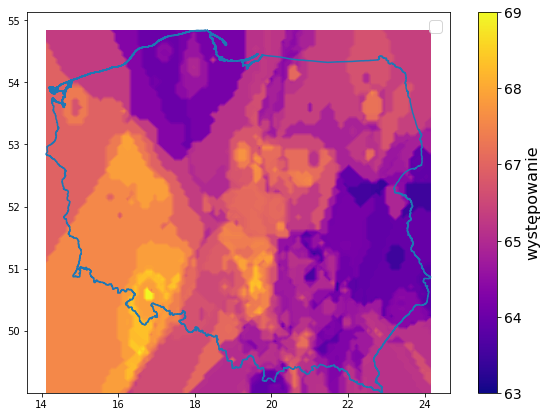

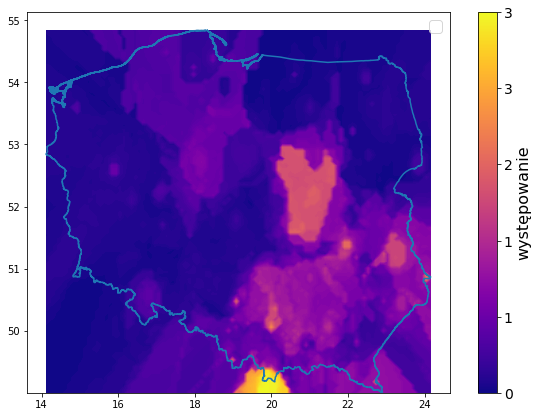

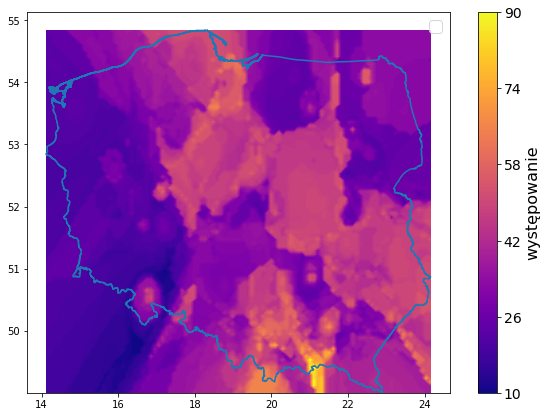

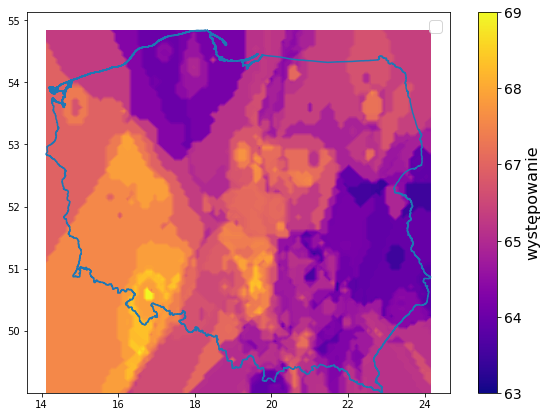

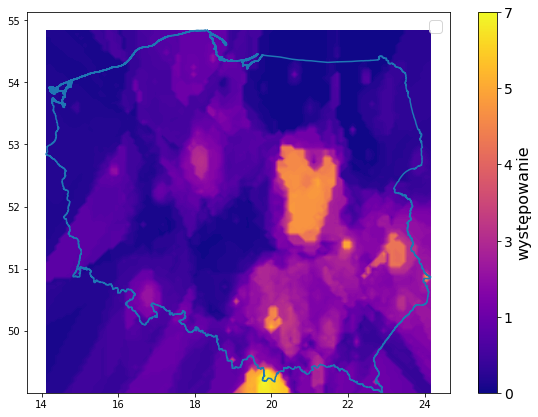

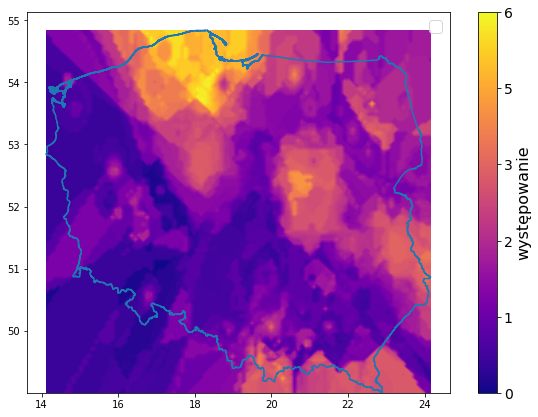

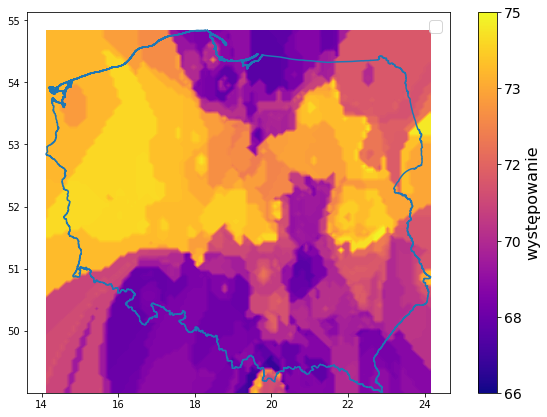

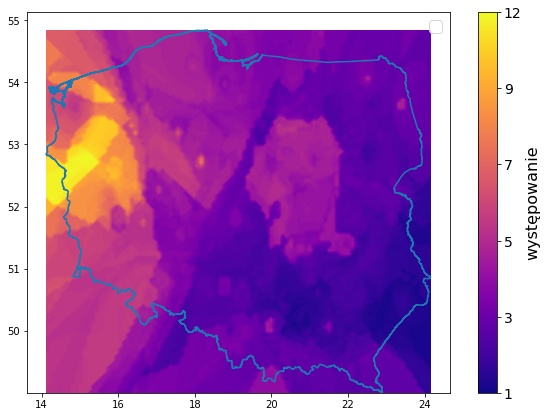

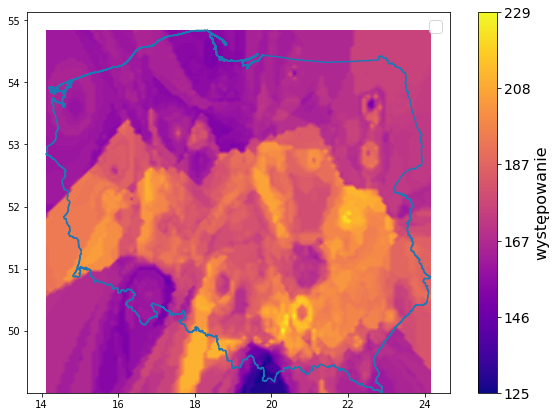

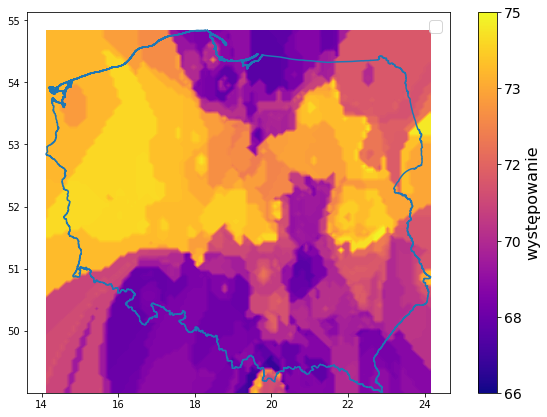

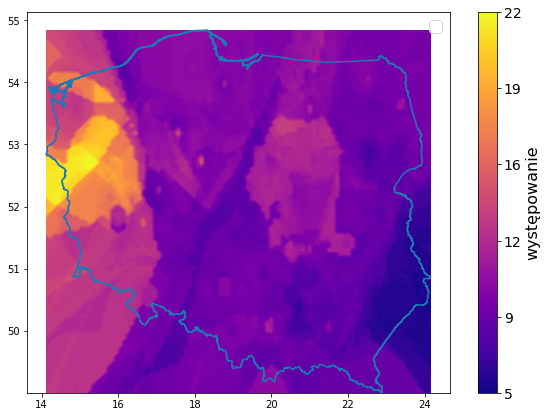

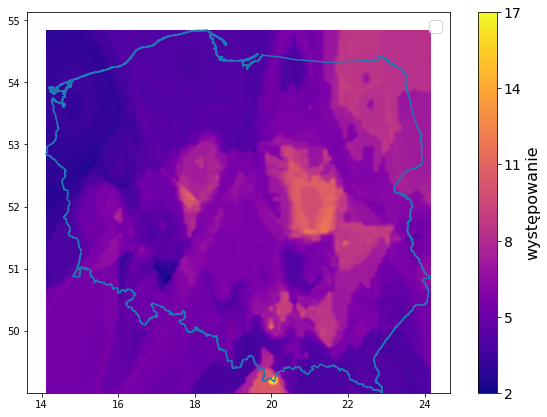

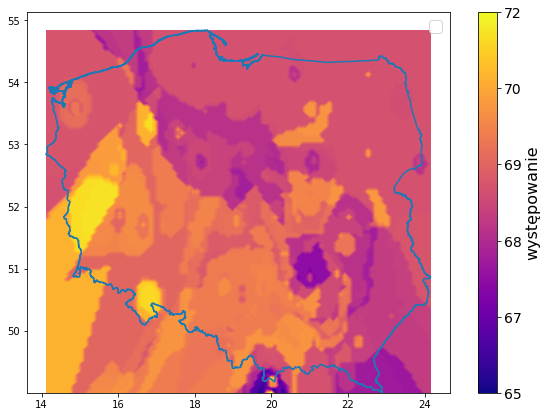

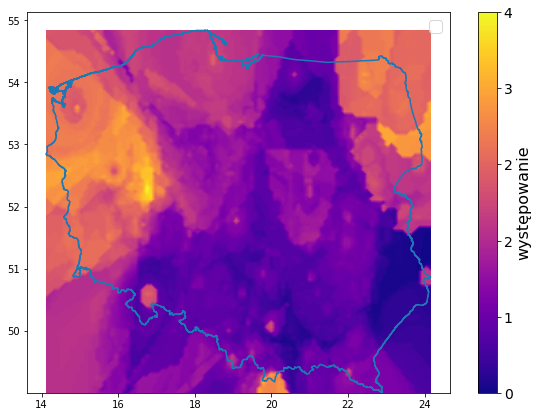

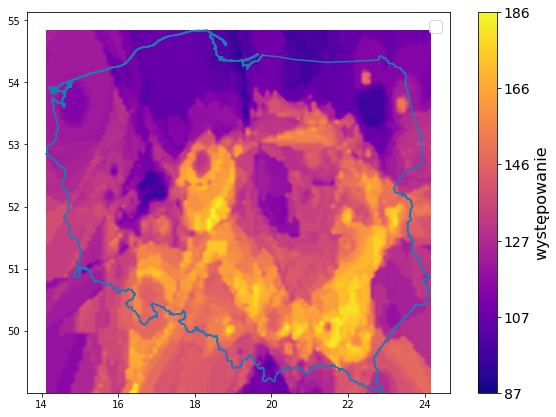

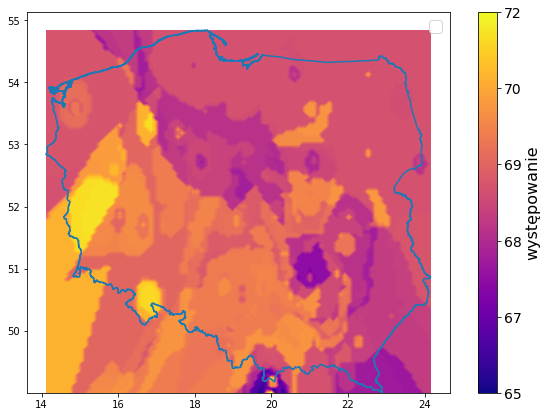

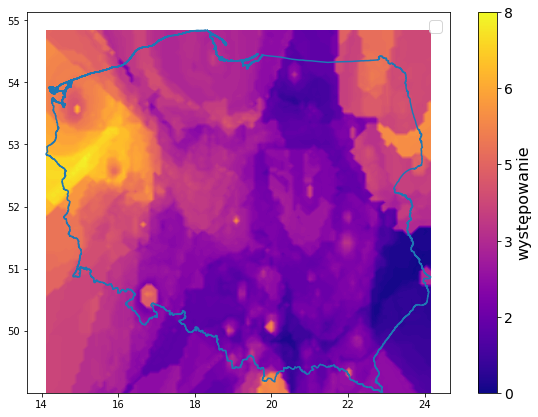

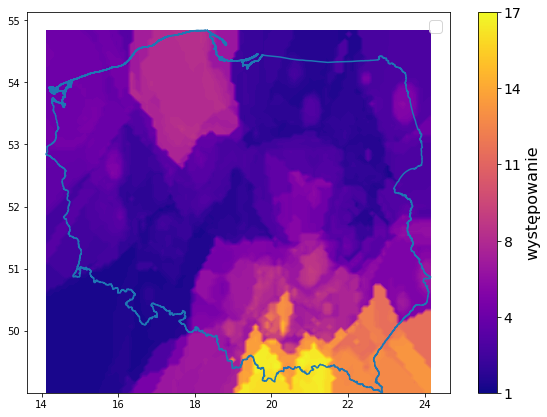

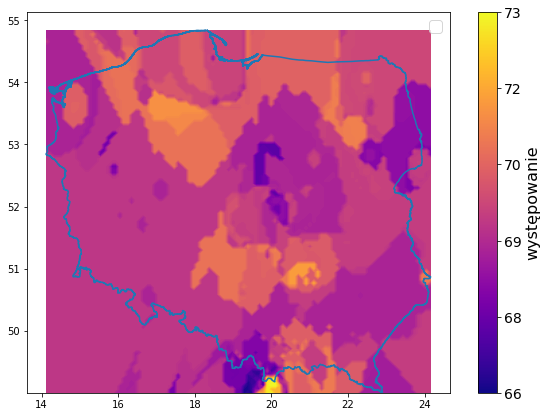

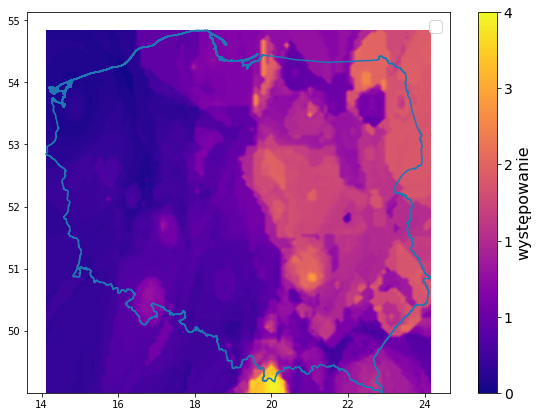

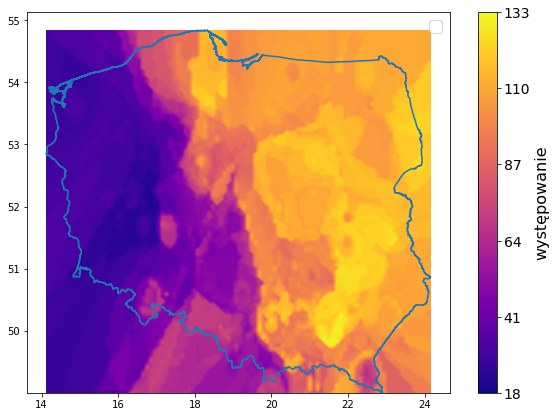

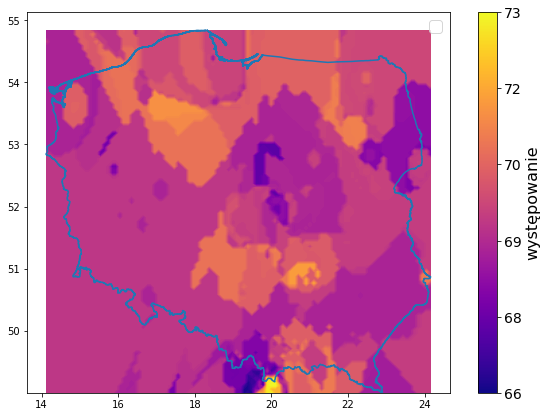

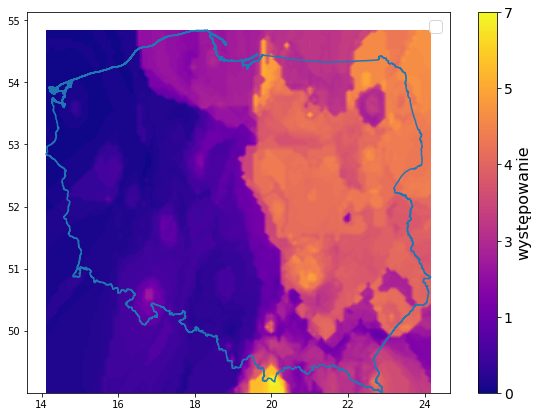

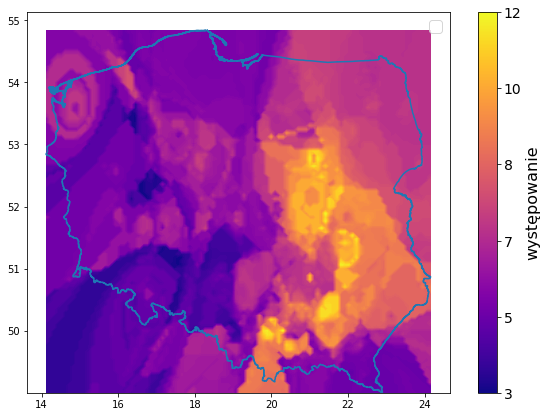

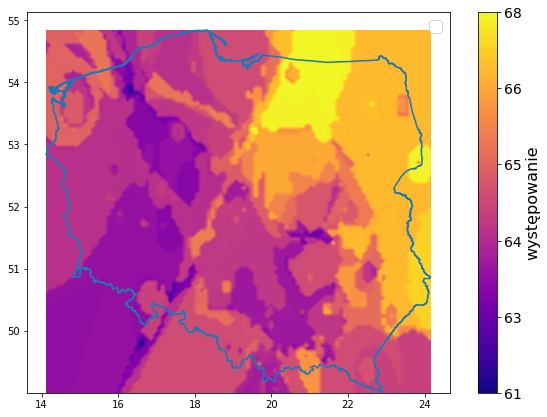

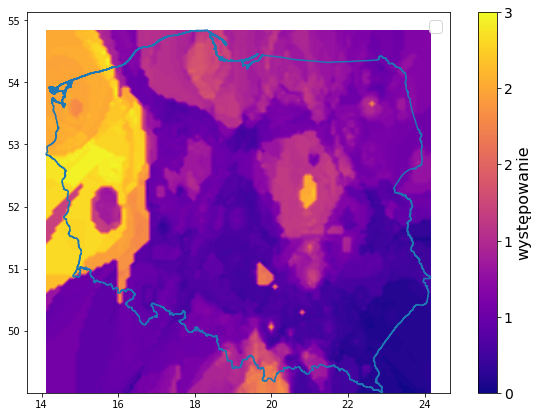

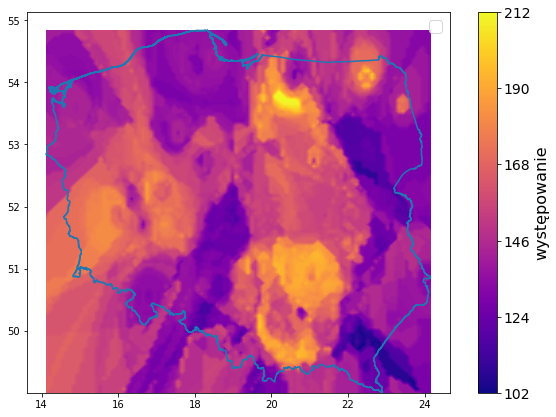

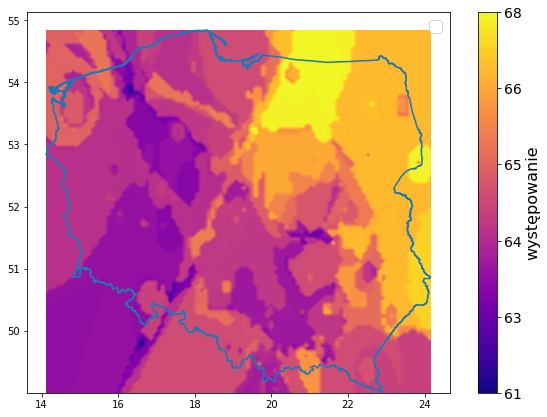

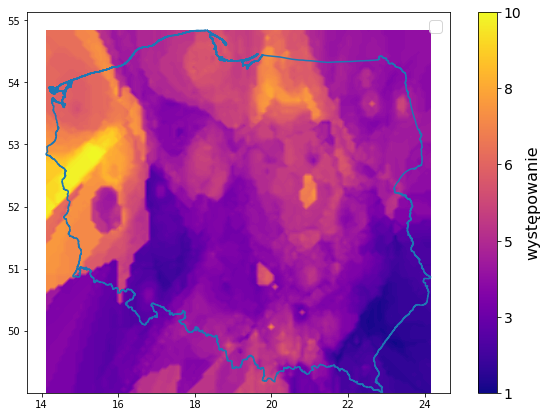

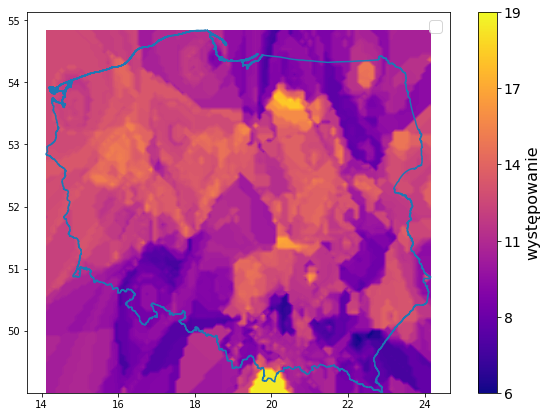

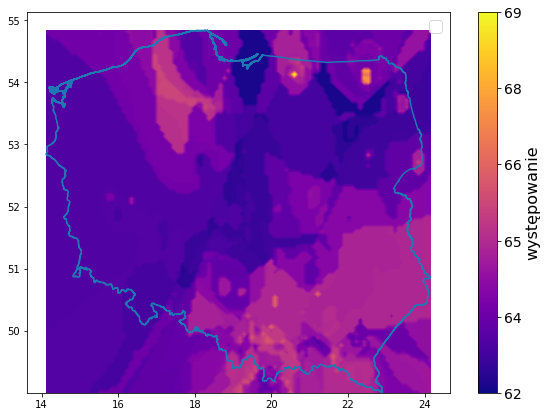

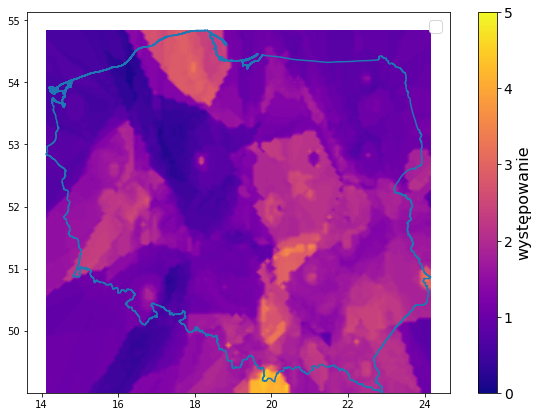

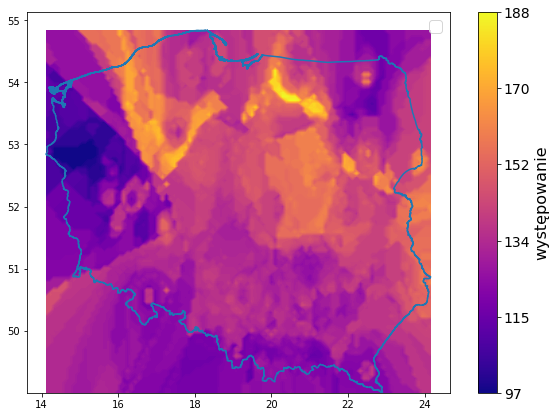

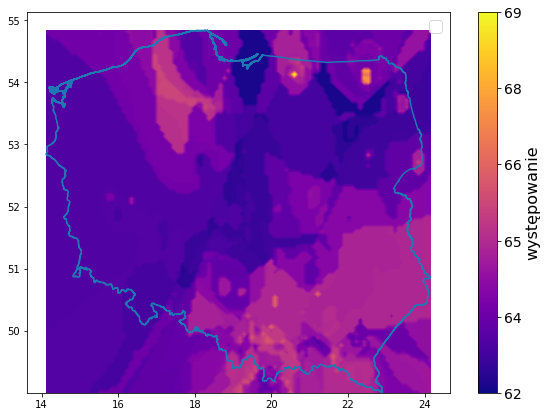

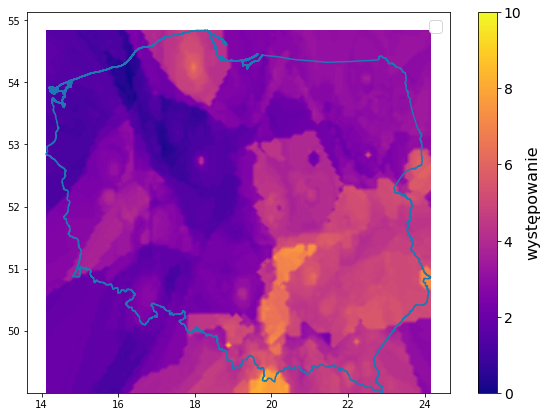

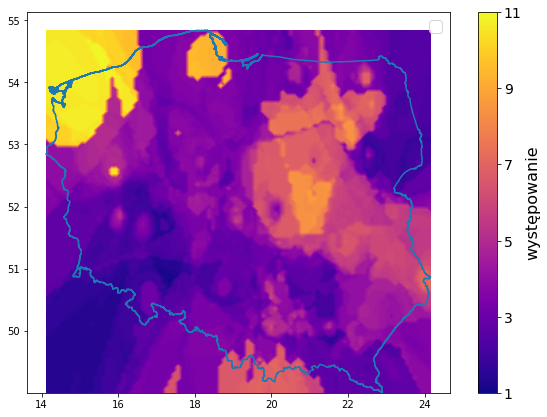

In [458]:
# create maps of pathogens occurence
from shapely import speedups
os.makedirs('maps', exist_ok=True)

for y in range(2015,2020+1):
    for sp in range(0,1+1):
        for pathogen in ['summ_S_nodorum', 'summ_S_avenae', 'summ_S_tritici']:
            filt = ((grid_transformed_predictions['year'] == y) & 
                    (grid_transformed_predictions['species'] == sp) &
                    (grid_transformed_predictions['pathogen'] == pathogen))
            predictions_filtered = grid_transformed_predictions[filt]

            X_grid = np.array(predictions_filtered[['E', 'N']])
            y_grid = np.array(predictions_filtered['predictions'])


            speedups.disable()

            pl = geopandas.read_file("maska_PL.gpkg")
            pl.boundary.plot(figsize=(10,7))

            fig = plt.contourf(X_grid.T[0].reshape(100,100),  X_grid.T[1].reshape(100,100), y_grid.reshape(100,100), 
            cmap=plt.get_cmap("plasma"), 
             levels = 100)
            cmap = mpl.cm.plasma

            tick_values = np.linspace(y_grid.min(), y_grid.max(), 11)
            cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=cmap))
            cbar.ax.set_yticklabels([int(round(v, 0)) for v in tick_values], fontsize=14)
            cbar.set_label('występowanie', fontsize=16)
            plt.legend(fontsize=16)
#             plt.show()
            plt.savefig(os.path.join('maps', 'map_%s_%s_%s.png' %(str(y), str(sp), pathogen)), dpi = 300)